In [ ]:
%%html
<div style="background-color: #FADBD8; padding: 20px; border-radius: 10px; text-align: center;">
    <h1 style="color: #C0392B; font-size: 36px;">
        Predicting Obesity Risk with Machine Learning 🩺🥼
    </h1>
</div>

**Goal**: Develop a machine learning model to accurately predict obesity levels in individuals based on a comprehensive range of personal information, lifestyle factors, and health indicators.<br>
**Objective**: The primary aim is to construct a robust predictive model capable of classifying individuals into different risk categories for obesity. This model will empower healthcare providers to identify individuals at heightened risk of developing obesity, facilitating early intervention and personalized preventive measures.<br>
**About Dataset**: The dataset encompasses estimates of obesity levels in individuals from Mexico, Peru, and Colombia, spanning ages 14 to 61, and representing diverse dietary habits and physical conditions.


# 1. **Importing important libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib


In [2]:
# for importing data directly form google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# unzip the data folder
!unzip '/content/drive/MyDrive/playground-series-s4e2.zip'

Archive:  /content/drive/MyDrive/playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 2. **Reading and knowing about Data**

## 2.1 Reading dataset

In [4]:
# reading training and testing dataset
df = pd.read_csv("/content/train.csv")

In [5]:
#printing frist 10 rows of data
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [ ]:
# renaming column 'NObeyesdad" as obesity_level for a better understanding
df.rename(columns = {'NObeyesdad':'obesity_level'}, inplace = True)

## 2.2 Description of dataset and columns information
| Feature                                   | Datatype     | Labels                                         | Description                                                |
|-------------------------------------------|--------------|------------------------------------------------|------------------------------------------------------------|
| ID                                        | Categorical  | -                                              | Unique identifier                                          |
| Smoke                                     | Categorical  | Yes, No                                       | Smoker or not                                              |
| Weight                                    | Numerical    | -                                              | Weight (Float)                                             |
| Age                                       | Numerical    | -                                              | Age (Float)                                                |
| Height                                    | Numerical    | -                                              | Height (Float)                                             |
| Gender                                    | Categorical  | Male, Female                                  | Gender                                                     |
| Family_history_with_overweight            | Categorical  | Yes, No                                       | Family history with overweight                             |
| FAVC                                      | Categorical  | Yes, No                                       | Frequent consumption of high-caloric food items            |
| FCVC                                      | Numerical    | -                                              | Frequency of consuming vegetables (Float)                  |
| NCP                                       | Numerical    | -                                              | Number of main meals consumed per day (Float)              |
| CAEC                                      | Categorical  | Sometimes, No, Frequently, Always            | Frequency of consuming food between meals                  |
| CH20                                      | Numerical    | -                                              | Amount of water consumed daily (Float)                     |
| CALC                                      | Categorical  | Sometimes, No, Frequently                    | Frequency of alcohol consumption                           |
| SCC                                       | Categorical  | Yes, No                                       | Monitoring of calorie consumption                          |
| FAF                                       | Numerical    | -                                              | Frequency of engaging in physical activity (Float)         |
| TUE                                       | Numerical    | -                                              | Time spent using technology devices (Float)                |
| MTRANS                                    | Categorical  | Automobile, Bike, Motorbike, Public_Transportation, Walking | Mode of transportation used                              |
| obesity_level                               | Categorical  | Underwright, Normal, two levels of Overweight ,three levels of Obesity                                  | Categorizes individuals into different weight or obesity categories (TARGET) |

In [ ]:
# dropping id column from both training and test data as it is just a unique identifier like index of dataset
df.drop(columns = 'id',inplace = True)

In [ ]:
# printing shape of both datasets
print(f"training data contains {len(df)} rows and {df.shape[1]} columns")

training data contains 20758 rows and 17 columns


In [ ]:
# knowing data and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

## Checking null values

In [ ]:
# checking null values in training data
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
obesity_level                     0
dtype: int64

In [ ]:
# checking duplicate values
df.duplicated().sum()

0

In [ ]:
# separating numerical and categorical columns
num_cols = [cols for cols in df.columns if df[cols].dtype != 'object']
cat_cols = [cols for cols in df.columns if df[cols].dtype == 'object']

In [ ]:
num_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [ ]:
# checking whether target column is balanced or imbalanced
df['obesity_level'].value_counts(1)

obesity_level
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

### **Key insights from the above analysis**
- Training data have 17 columns and 20758 rows.
- Data contains 8 numerical and 9 categorical columns.
- Data is clean and does not contain any null and duplicate values.
- Obesity_level column is target variable and is balanced.
- This is a balanced multiclass classification problem.

In [ ]:
# basic descriptive stats about numerical columns of data
df.describe().style.background_gradient(cmap='RdPu', axis=1)

#### **Summary stats of data**
- Data has samples of 20,758 people ranging from 14 to 61 years old with a average age of 23 years.
- weight of respondants range from 39 kg to 165 kg with a average of 87.88 kg.
- height of respondants vary from 1.45 metre to 1.97 metre with a average of 1.70 metre.
- Most of the persons are having 3 meals per day.
- most of the people are having 2 liters of water per day.
- people are having more time with technology.


In [ ]:
# basic informtation about categorical columns in data
df.describe(include = ['object']).style.background_gradient(cmap='RdPu', axis=1)

#  **3. Exploratory Data Analysis**

## **3.1 Univariate Analysis**

### Analysing categorical columns



In [ ]:
def catplot(dataframe, col_name, style, hue=None):
    sns.set_theme(style='ticks')  # Move seaborn style setting to the beginning
    plt.style.use(style)  # Set the style using plt.style.use

    figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))
    figure.suptitle(col_name, fontsize=30, fontstyle = 'oblique')

    order = dataframe[col_name].value_counts().index
    order_val = dataframe[col_name].value_counts().values

    cat_df = pd.DataFrame(dataframe[col_name].value_counts()).reset_index()

    cat_df['pct'] = cat_df['count'].apply(lambda x: np.round((x/cat_df['count'].sum()) *100,2))

    df1 = df.groupby([col_name, 'obesity_level'])[['obesity_level']].count()
    pcts= df1.groupby(level= [0]).apply(lambda x: 100 * x / float(x.sum()))
    pcts[col_name] = pcts.index.get_level_values(0)
    pcts['obesity'] = pcts.index.get_level_values(2)
    pcts.reset_index(drop=True, inplace=True)


    pie_chart = dataframe[col_name].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True, colors = sns.color_palette("flare"))
    axes[0].set_ylabel('')
    for text in pie_chart.texts:
        text.set_fontsize(16)

    fig_bar = sns.countplot(data=dataframe, y=col_name, order=order, ax=axes[1], palette= "flare")
    fig_bar.set_xlabel('')
    fig_bar.set_ylabel('')
    axes[1].set_yticklabels(order)

    for p, val, pct in zip(fig_bar.patches, order_val, cat_df['pct']):
        fig_bar.annotate(f"{val}", (p.get_width(), p.get_y() + p.get_height() / 2),
                         xytext=(38, -2),
                         textcoords='offset points',
                         fontsize=14,
                         ha='center')

    fig_bar.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    fig_bar_hue = sns.barplot(data=pcts, x=col_name, y = 'obesity_level', hue='obesity', ax=axes[2], palette= "flare")
    fig_bar_hue.set_xlabel('')
    fig_bar_hue.set_ylabel('')
    axes[2].set_yticklabels('')

    for p in fig_bar_hue.patches:
        height = p.get_height()
        fig_bar_hue.text(x=p.get_x() + (p.get_width() / 2), y=height +1, ha='center', s=f'{round(height,2)}%', fontsize=14)

    for pos in ['right', 'top', 'bottom', 'left']:
        axes[2].spines[pos].set_visible(False)  # Set spines for the last subplot

    plt.tight_layout()
    plt.show()


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# creatting separate list of categorical columns without target variable
cat_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

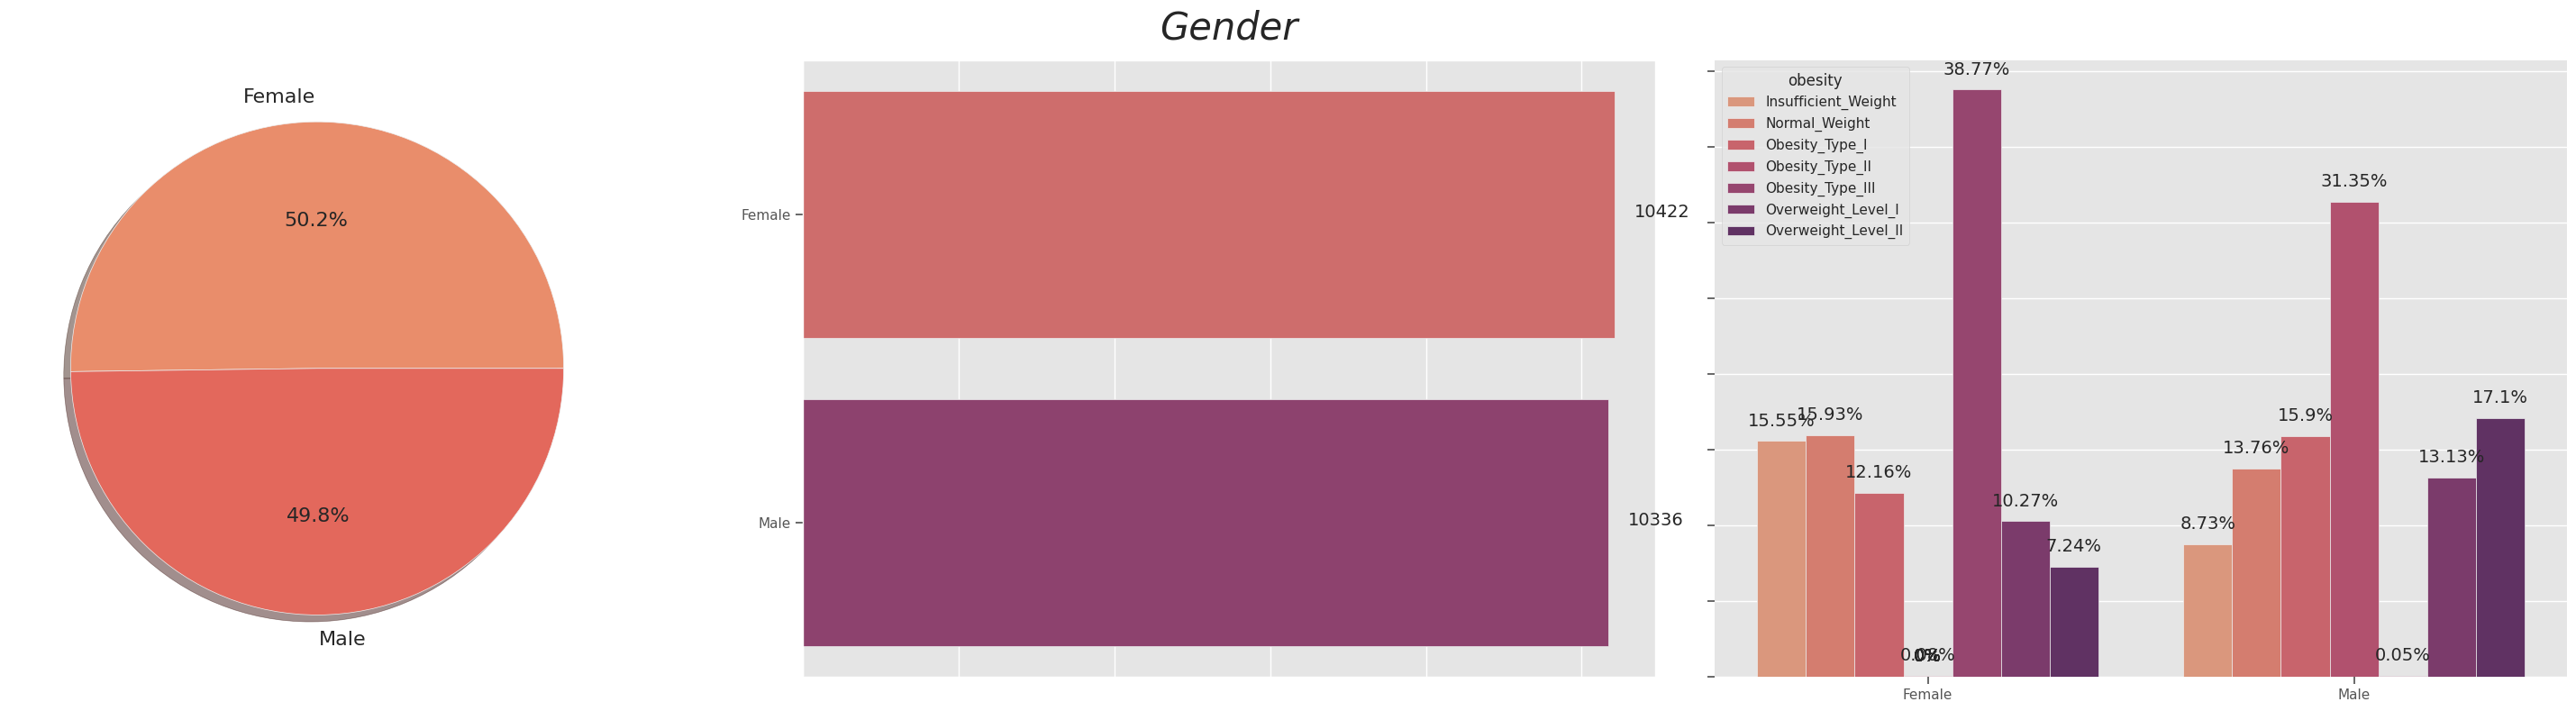

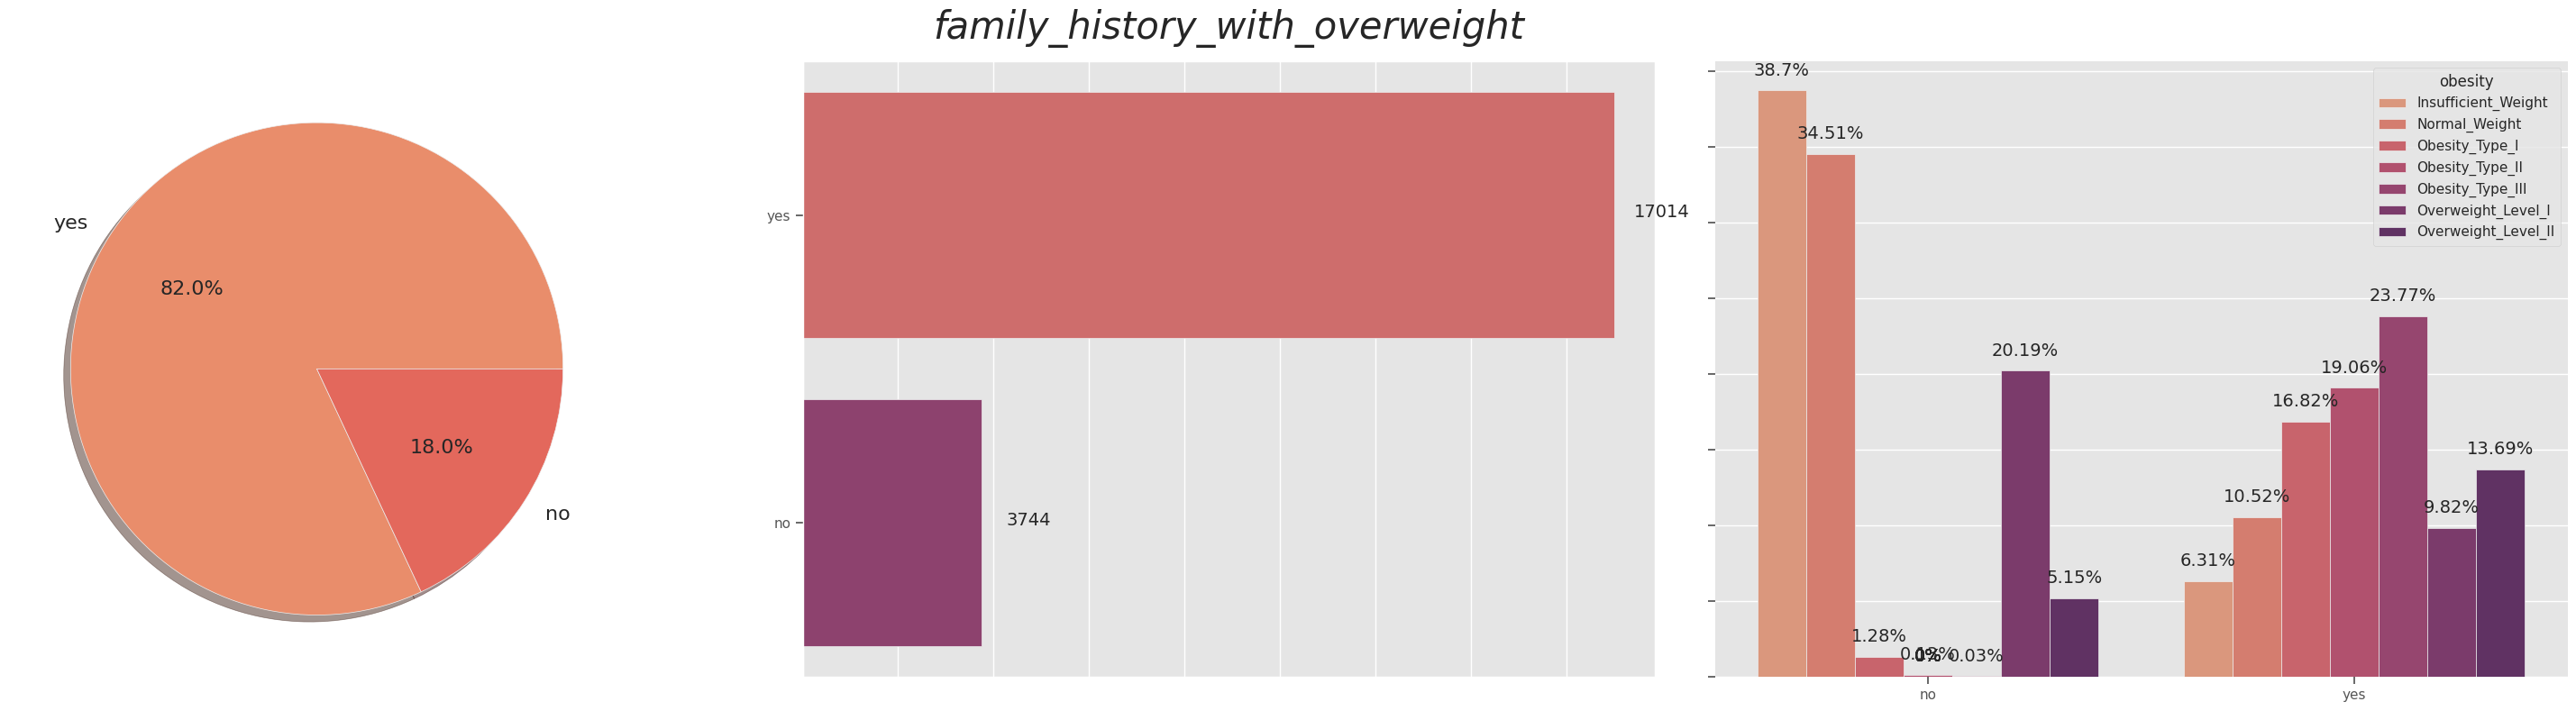

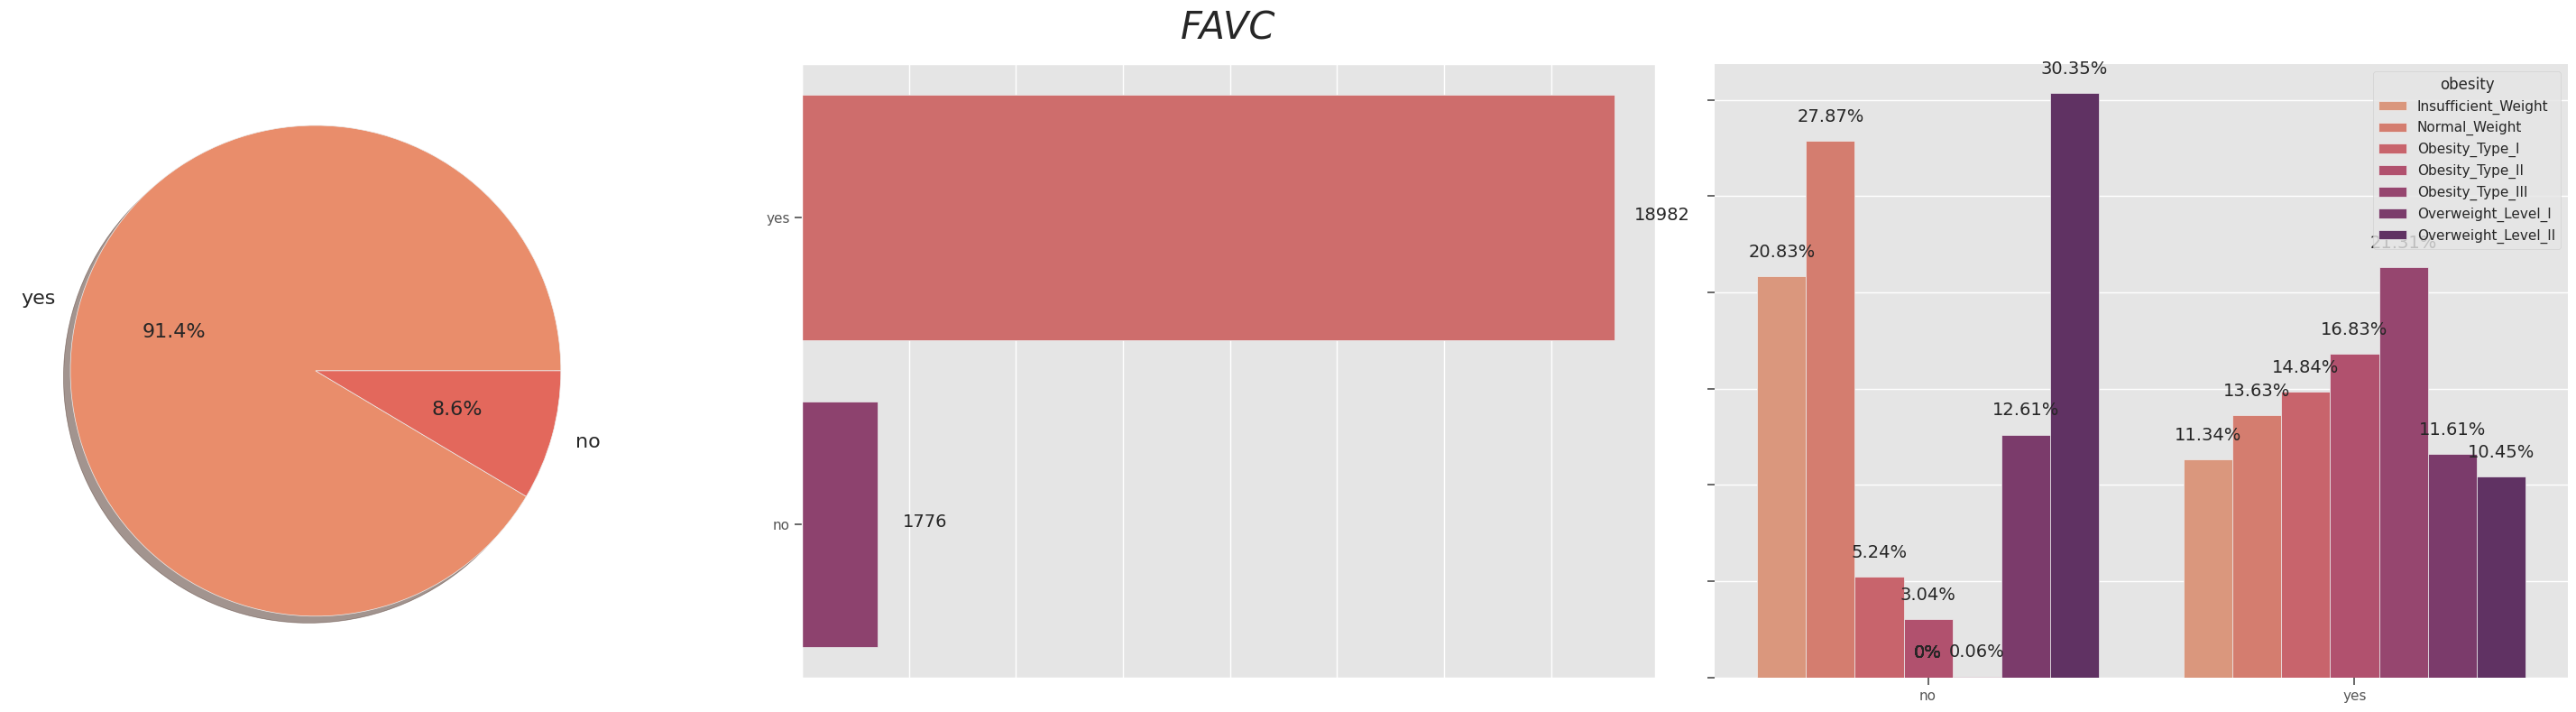

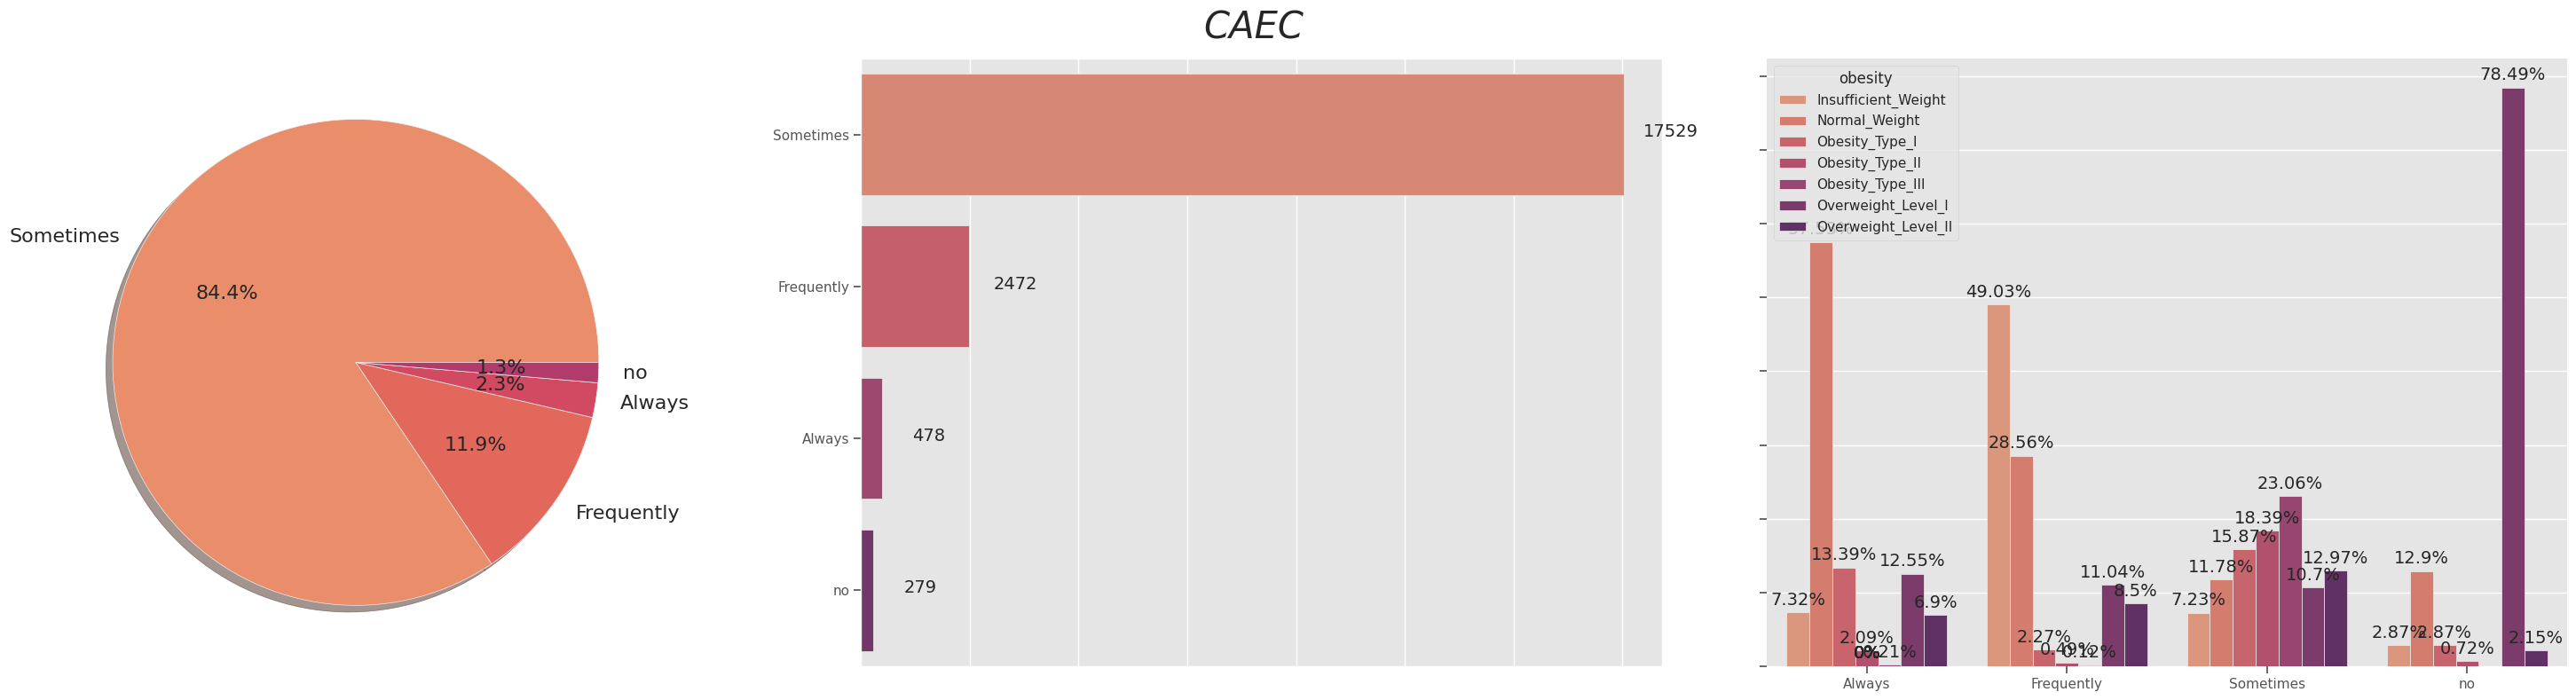

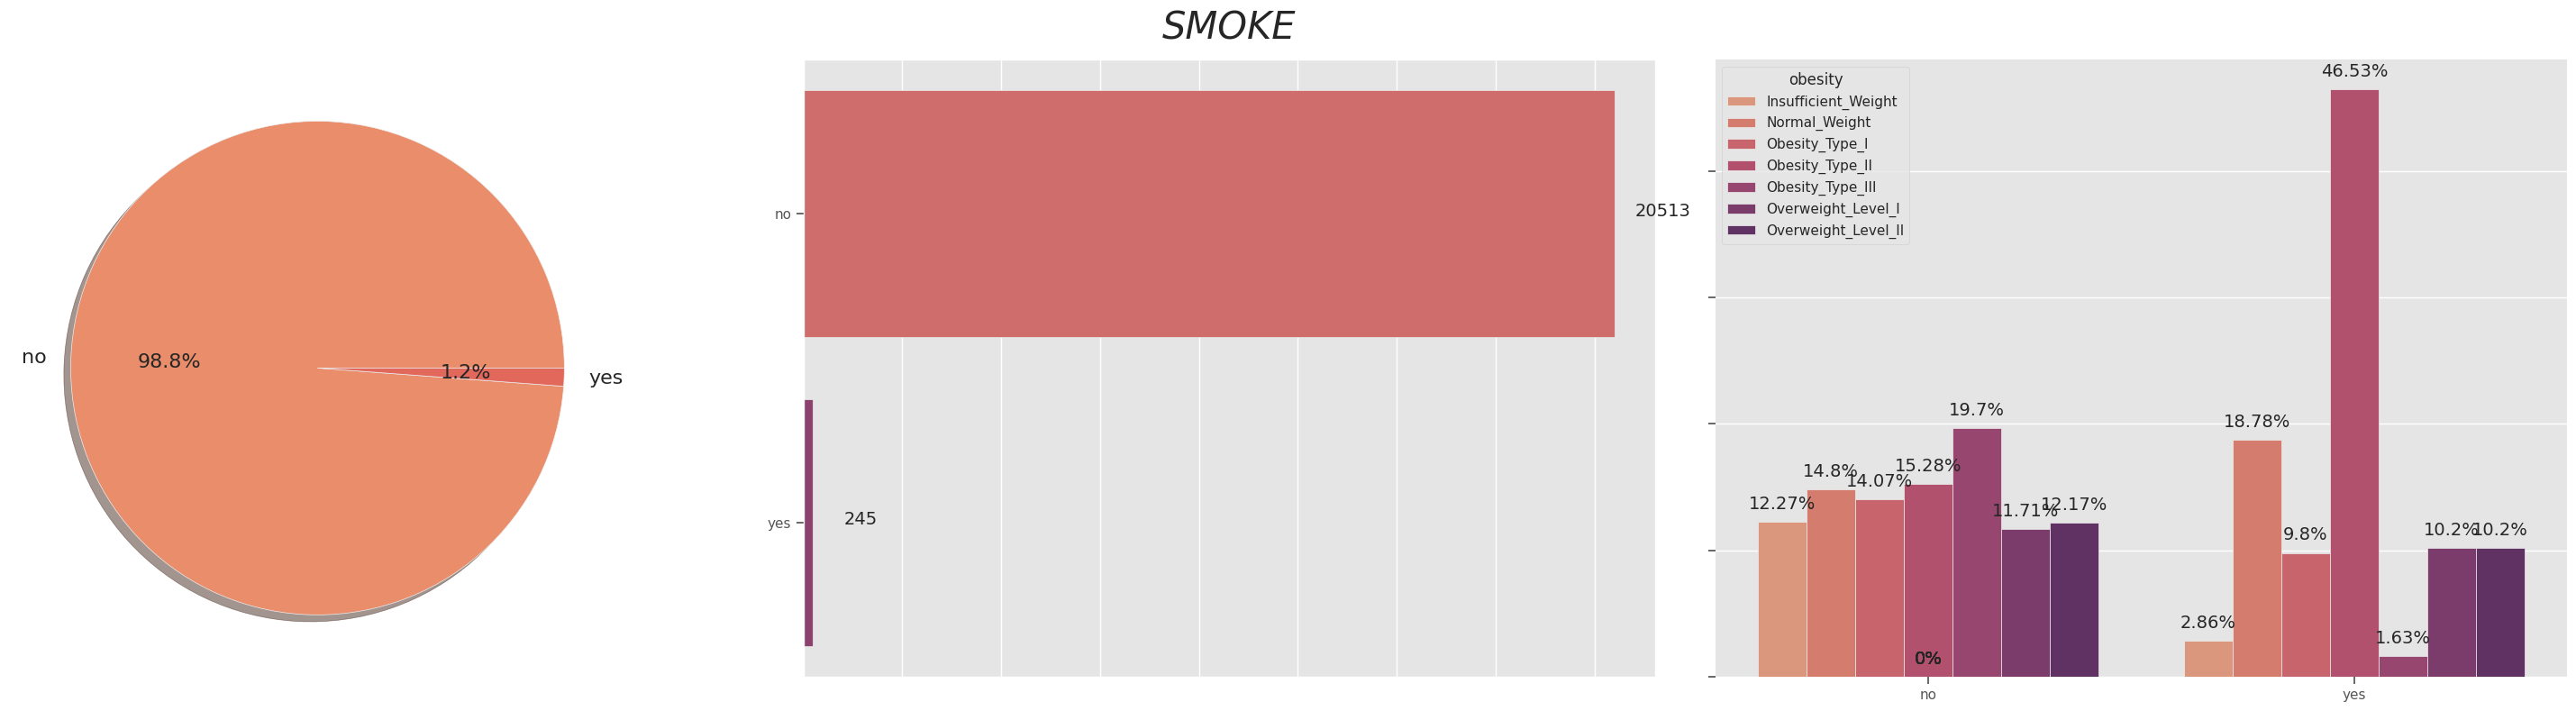

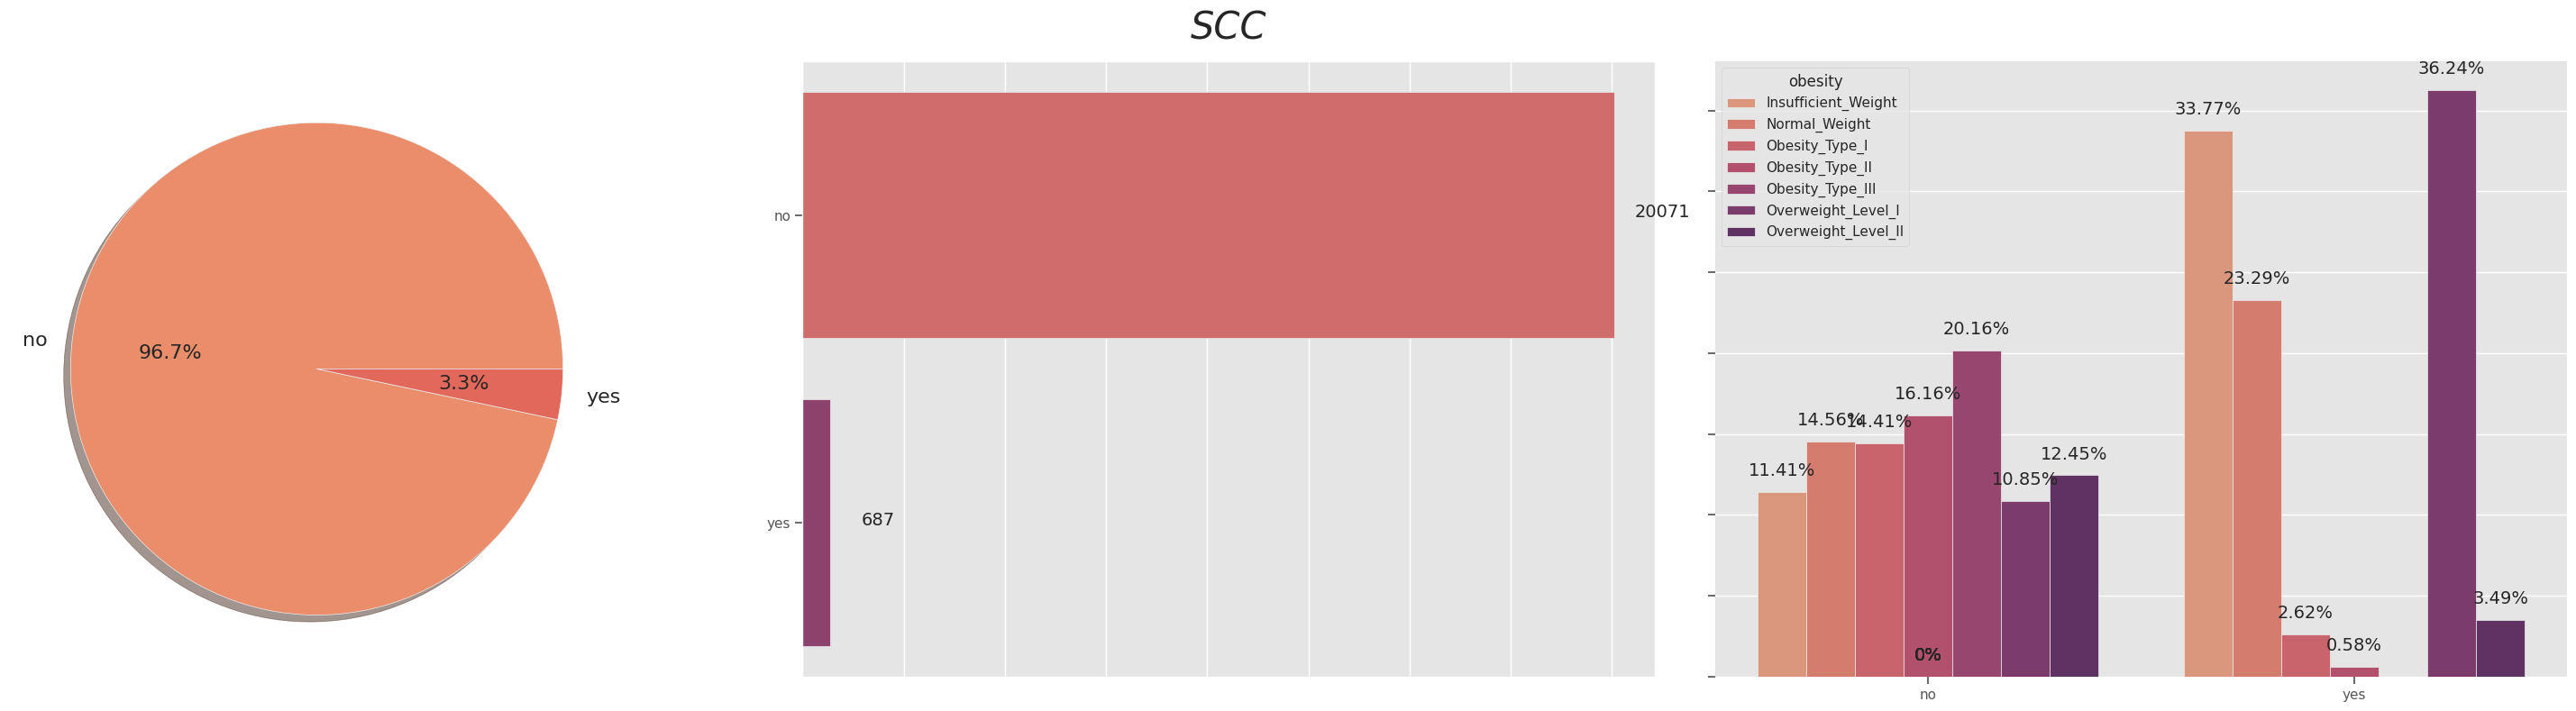

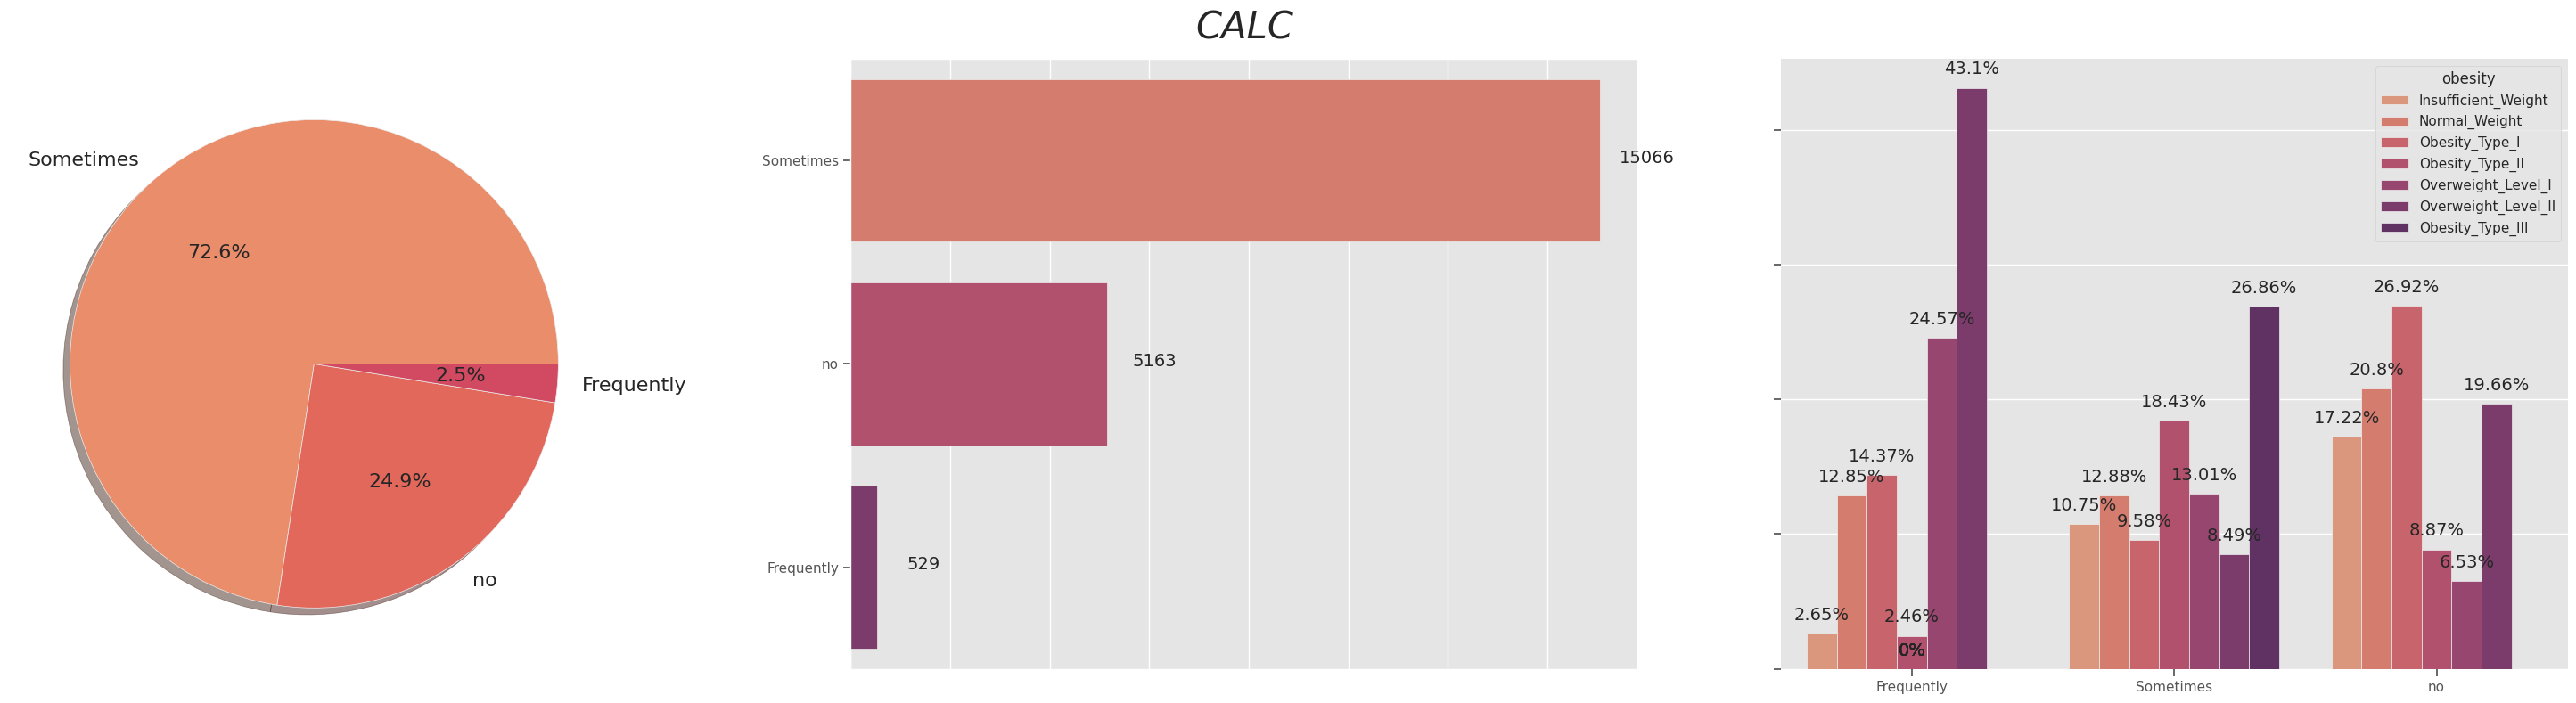

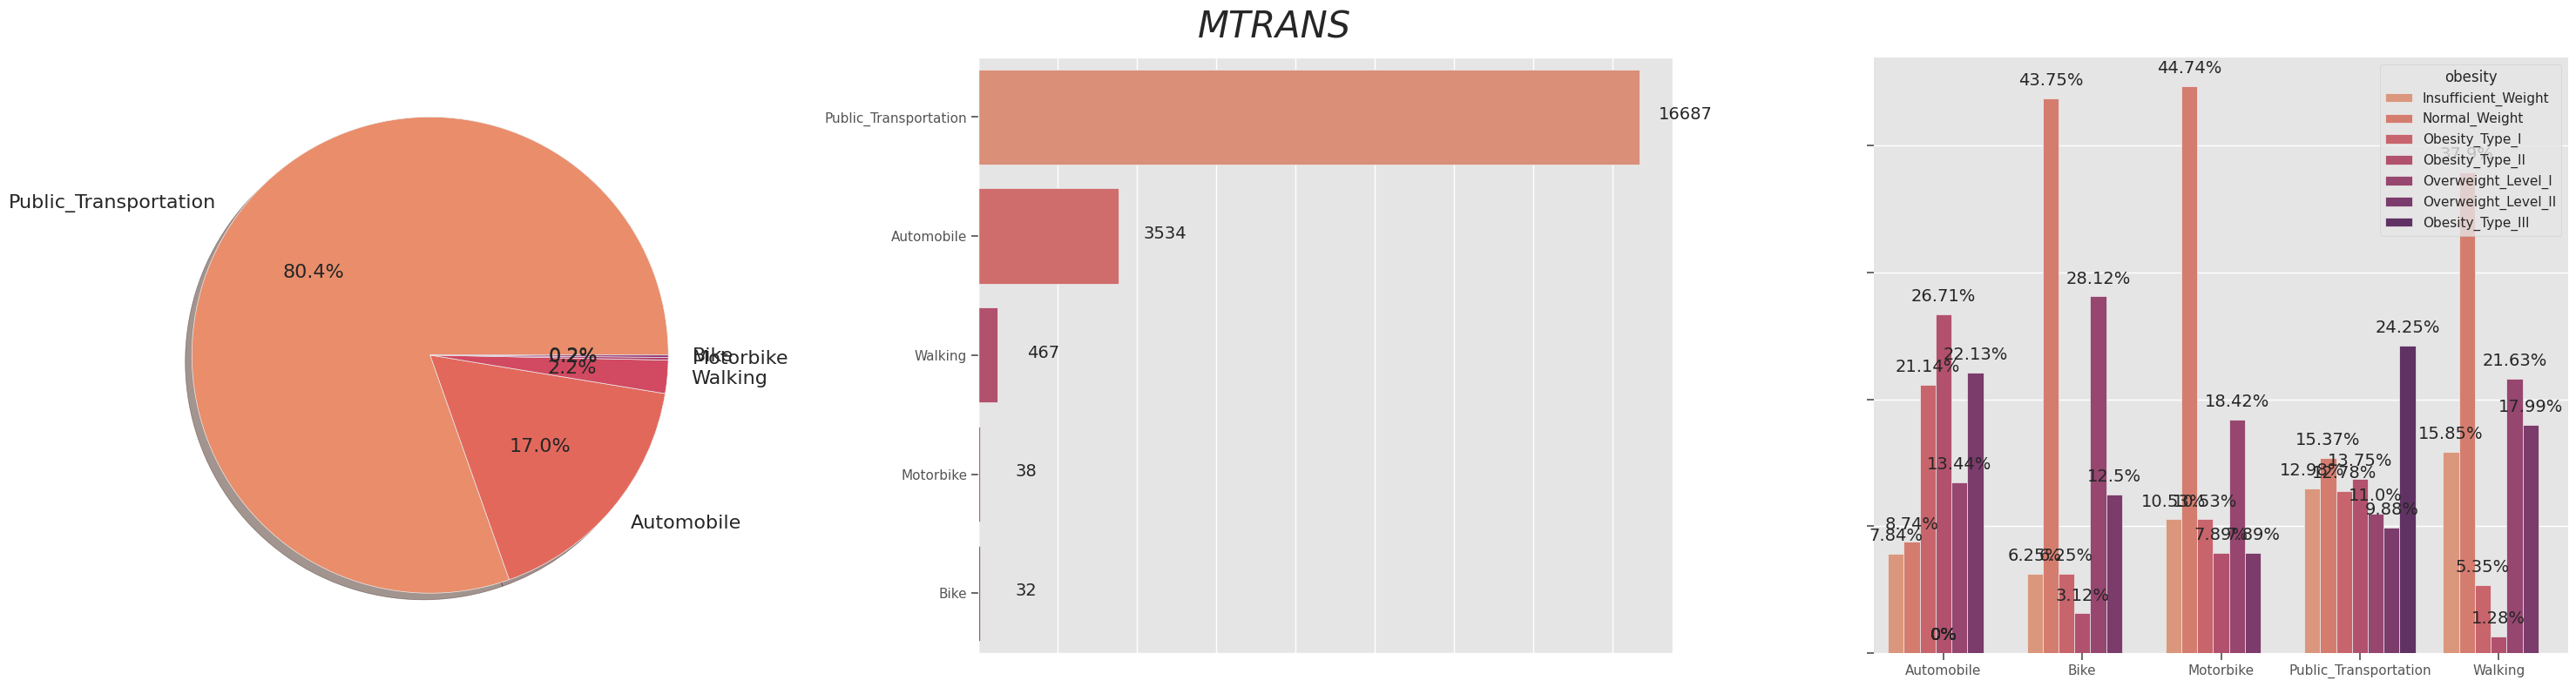

In [ ]:
style = 'ggplot'
for col in cat_columns:
    catplot(df, col, style, hue='obesity_level')

### **The graph shows various categorical columns and their percentage distribution in data along with what propoertion they hold at different obesity levels.**<br>
**Gender:** Data consists of almost 50% percent male and 50% percent women. Highest no. of men are having Obesity Type 2 which is lowest in womwn and highest percentage of women are having Obesity type 3 which is lowest in men.<br>
**Family history with overweight:** people having family history with overweight are more prone to overwight ad=nd obesity problems.<br>
**Freqency of high chaloric food consumption:** more than 90% of samples are consuming high chaloric food which is a significant reason for obesity and overweight.<br>
**Consumption of food between meals:** highest number of people who are having food between meals are normally weighted and people who frequently consume food between meals are having insufficent weight while people who eat food betwween meals sometimes and never are having risk of obesity and overweight.<br>
**Smoke:**highest number of people who smoke are having type 2 obesity<br>
**Monitroing of calorie coonsumption:** higher percentage of people who monitor thier calorie consumption are having overweight level 1 or insufficeint weight.<br>
**Alchohol consumption:** highest no. of people who do not consume alchohol have obelsity type 1 while people who cosume alchohol frequently are overweight level 1.<br>
**Means of Transportation:** people who travel with public transport are more prone to obesity type 3 followed by obesity type 2 and obesity type 1 while higest no. of people who travel with automobiles are having obesity type 2 and are overweigt at level 2.

  

## Visualising Numerical Columns

In [ ]:
def kde_plots(dataframe, col_name, style):
  sns.set_theme(style='ticks')
  plt.style.use(style)
  figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
  figure.suptitle(col_name, fontsize=30)
  fig_dis = sns.kdeplot(data=dataframe,
                         x=col_name,
                         common_norm=False,
                         alpha=.5,
                         fill=True,
                         linewidth=0,
                         ax=axes[0],
                        color = "#C21E56")
  axes[0].grid(False)

  fig_dis_hue = sns.lineplot(data=dataframe,
                         x ='obesity_level',
                         y = col_name,
                         linewidth=0,
                         ax=axes[1],
                        palette = "flare")
  axes[1].set_xticklabels(df['obesity_level'].unique())
  fig_dis_hue.tick_params(axis='x', labelrotation = 60)

  axes[1].grid(False)
  sns.despine(offset=10, trim=True)

  plt.tight_layout()
  plt.show()




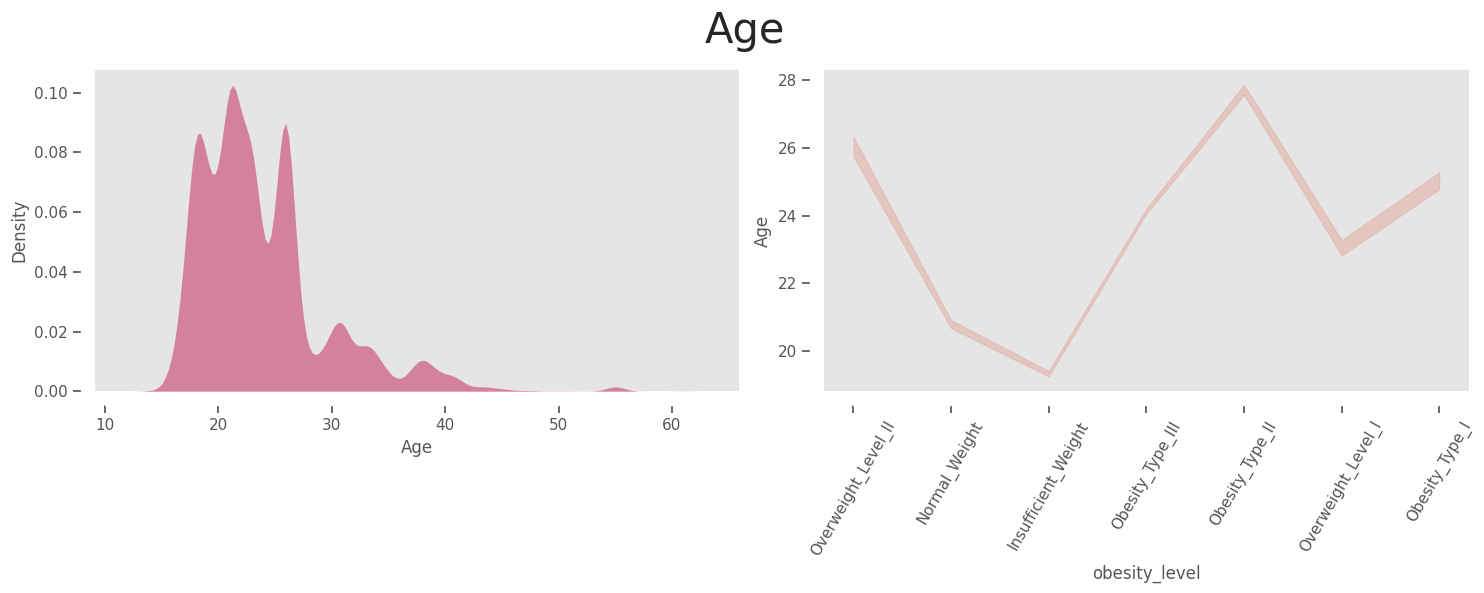

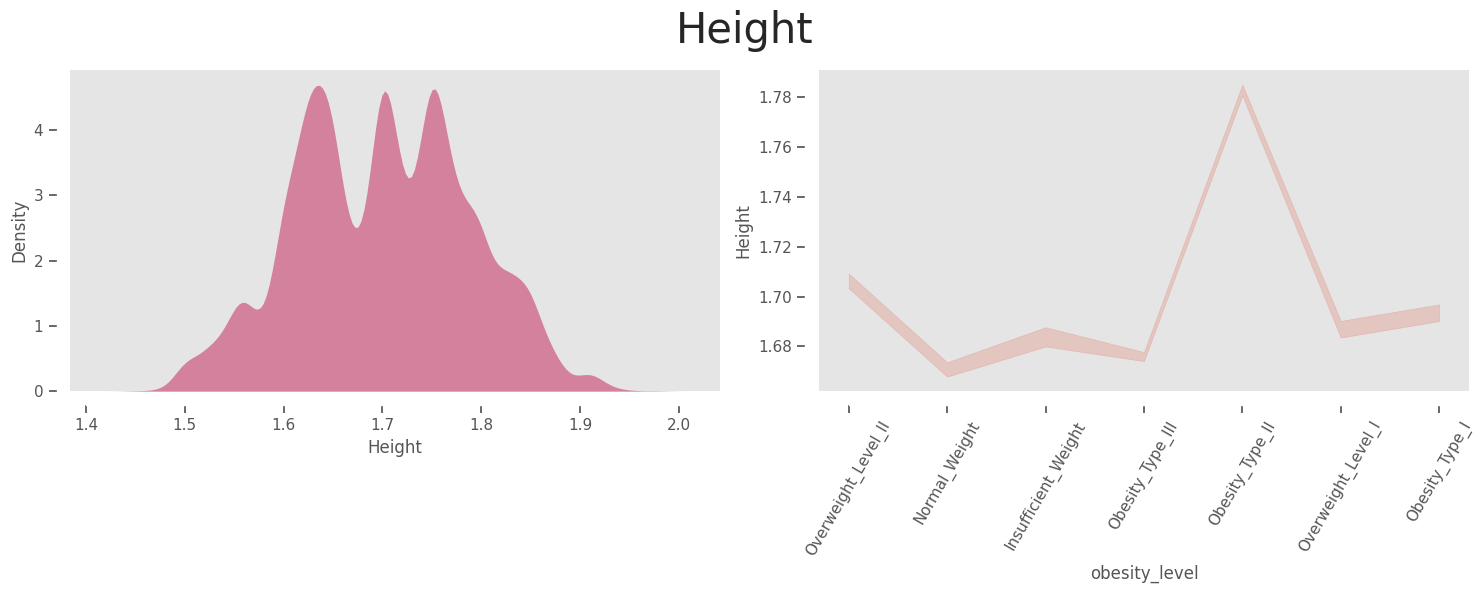

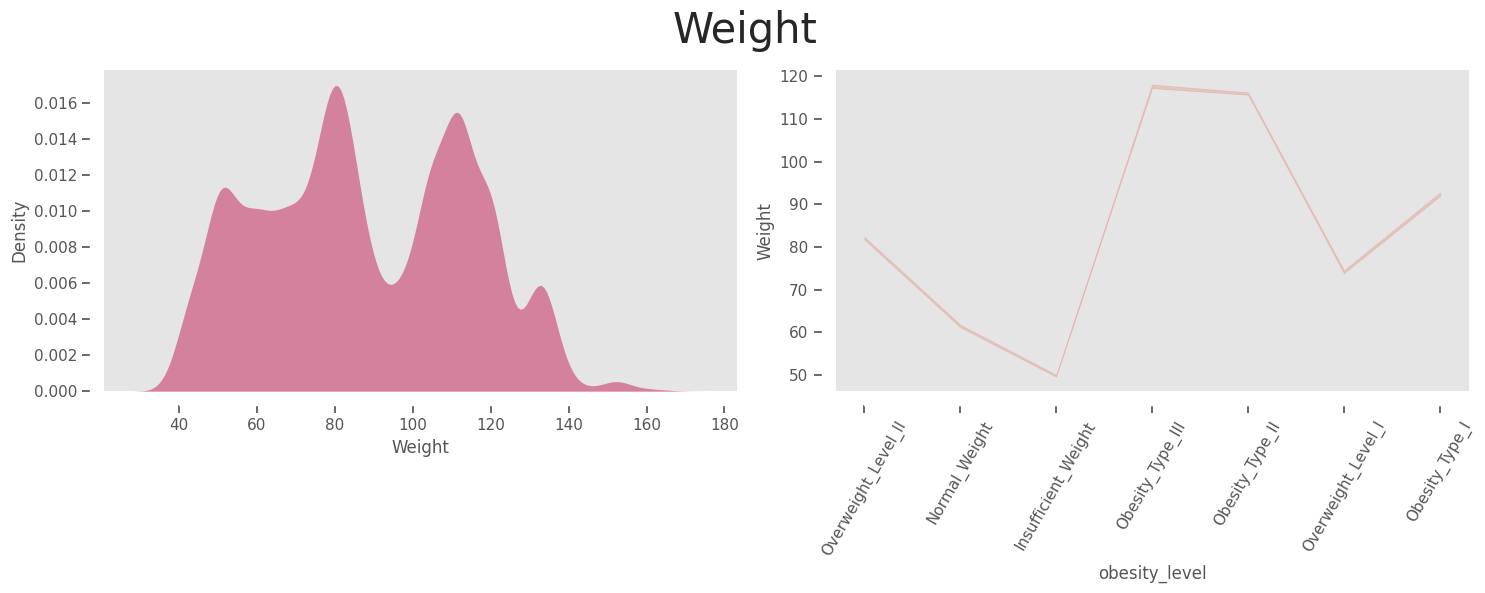

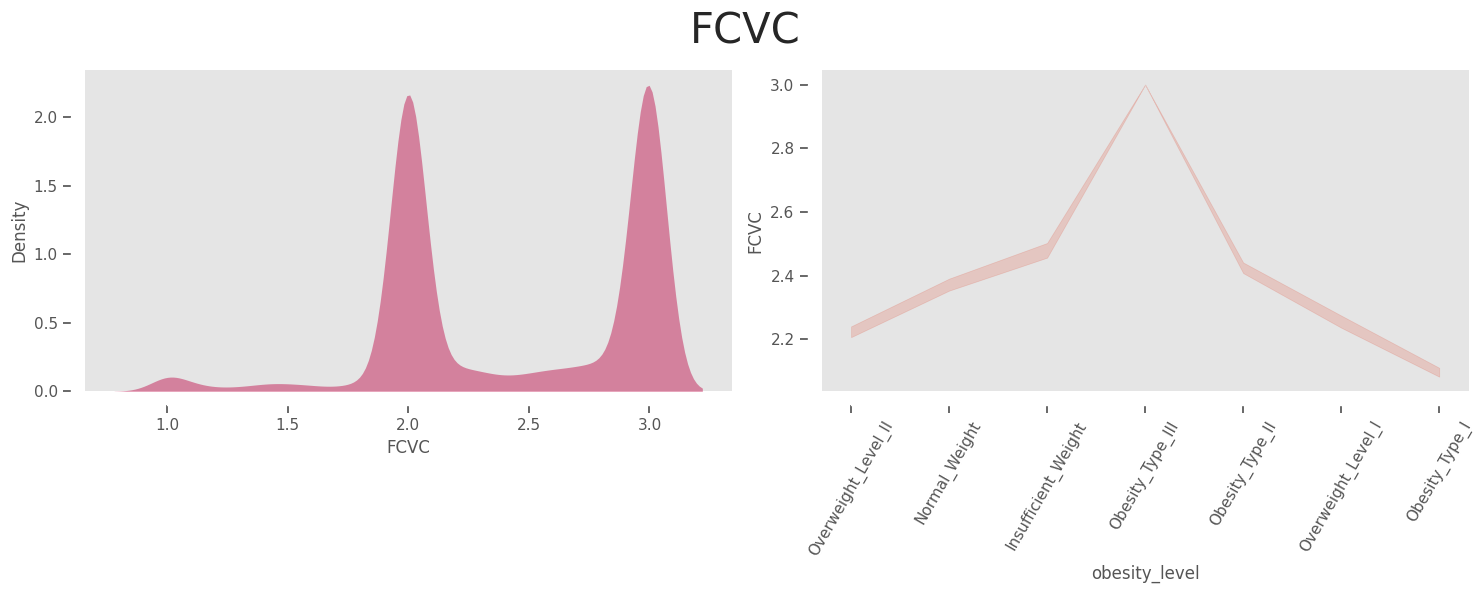

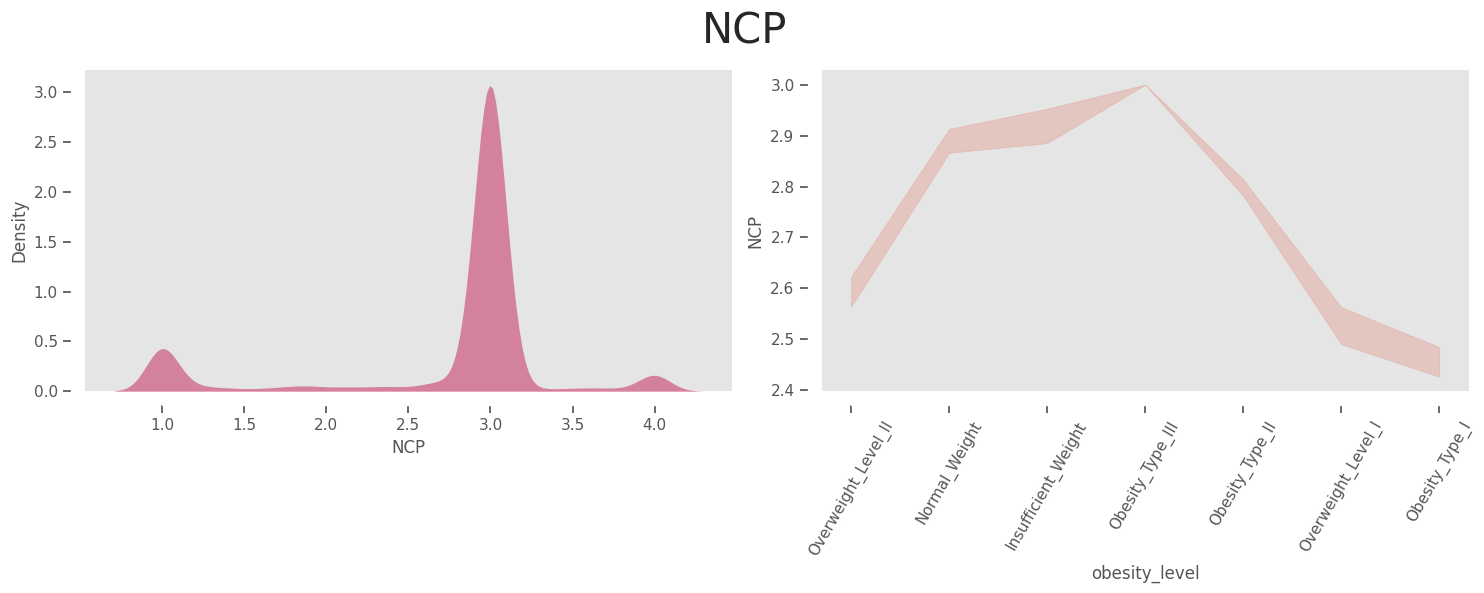

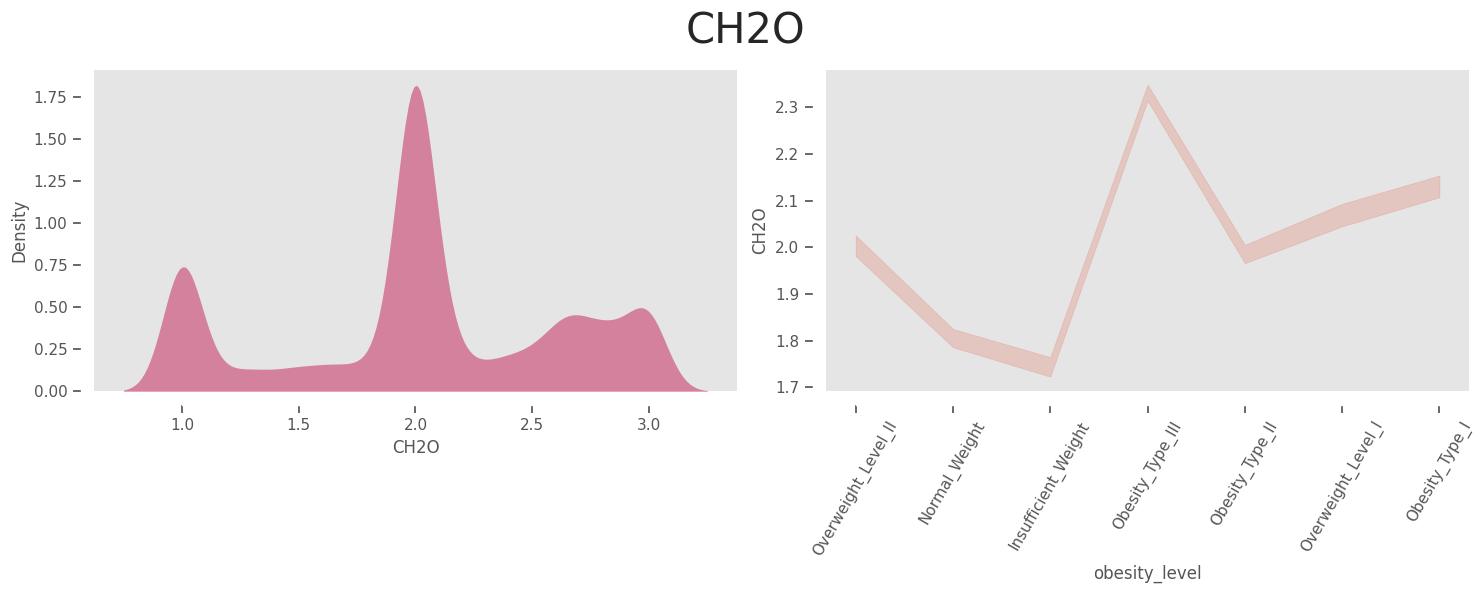

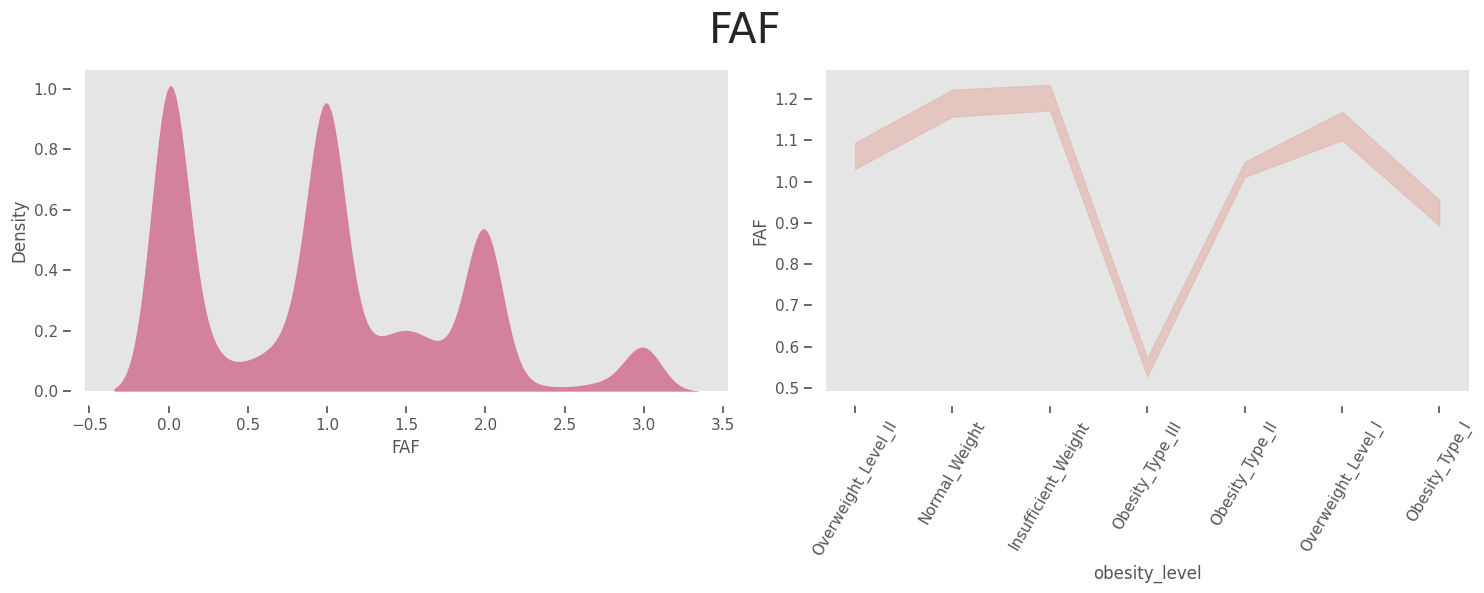

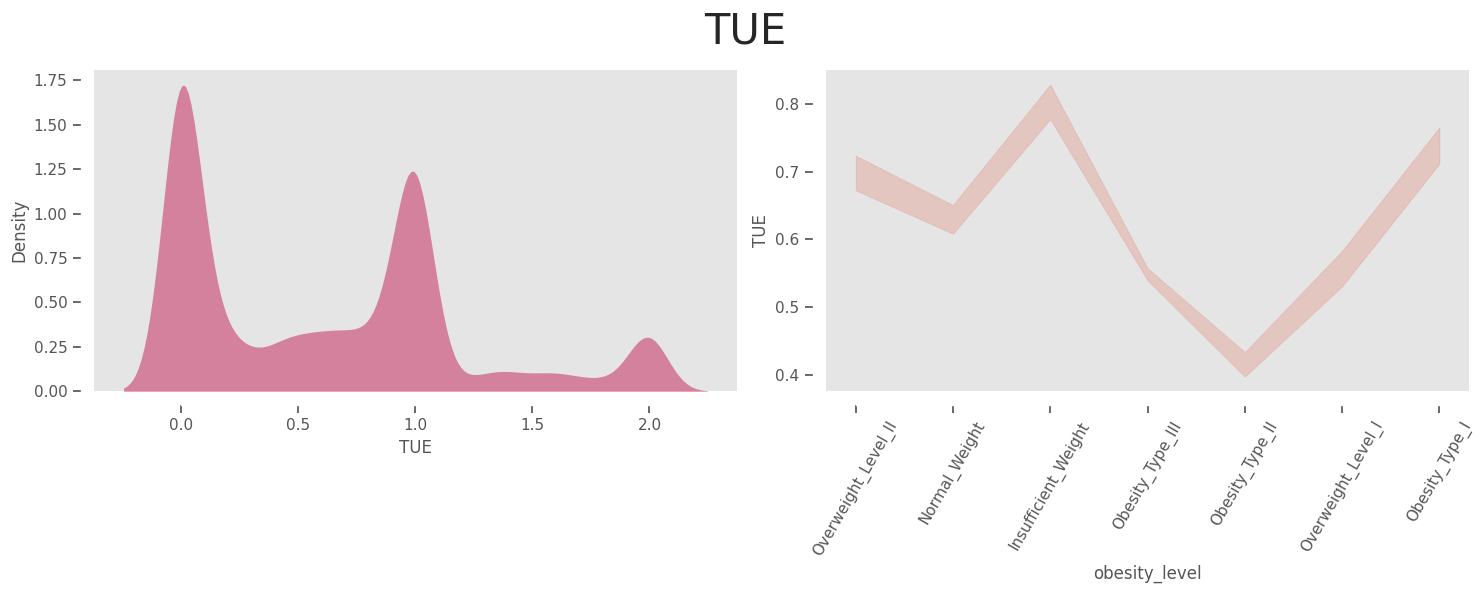

In [ ]:
style = 'ggplot'
for col in num_cols:

  kde_plots(df, col, style)

In [ ]:
df.groupby('obesity_level')['Age'].describe().reset_index().style.background_gradient()

#### *Finding average age at each obesity level.*
- those who have obesity type 1 are 25 years old on an average while those whose who have obesity type 2 are 27 and obesity type 3 are 24 years old averagely.
- age ranges between 14 to 55 for those who have type 1 obesity, for obesity type 2 it ranges between 17 to 53 and for obesity type 3 it ranges between 18 to 30.
- this gives a important key point that only young people are having obesoty type 3.


In [ ]:
df.groupby('obesity_level')['Weight'].describe().reset_index().style.background_gradient()

#### *realtion between weight and obesity level*
- those who are having any type of obesity are having higher weight levels than others.
- this gives a direct relation between weight and obesity level.

In [ ]:
df.groupby('obesity_level')['Height'].describe().reset_index().style.background_gradient()

#### *there can be seen a important pattern emerging for height and obeisty level.*

In [ ]:
## adding BMI column as it will give a relation between height and weight and can relate more to obesity level.
## formula for calculating BMI is :  weight (kg) / [height (m)]2
df['BMI'] = df['Weight']/(df['Height'])**2

In [ ]:
df.groupby('obesity_level')['BMI'].describe().reset_index().style.background_gradient()

#### *increasing bmi is seen with each type of overweight anf obesity which shows a direct relation of BMI with obesity.*


## **3.2 Multivariate Analysis**

#### **Age and weight relation to obesity level.**

<Axes: xlabel='Height', ylabel='Weight'>

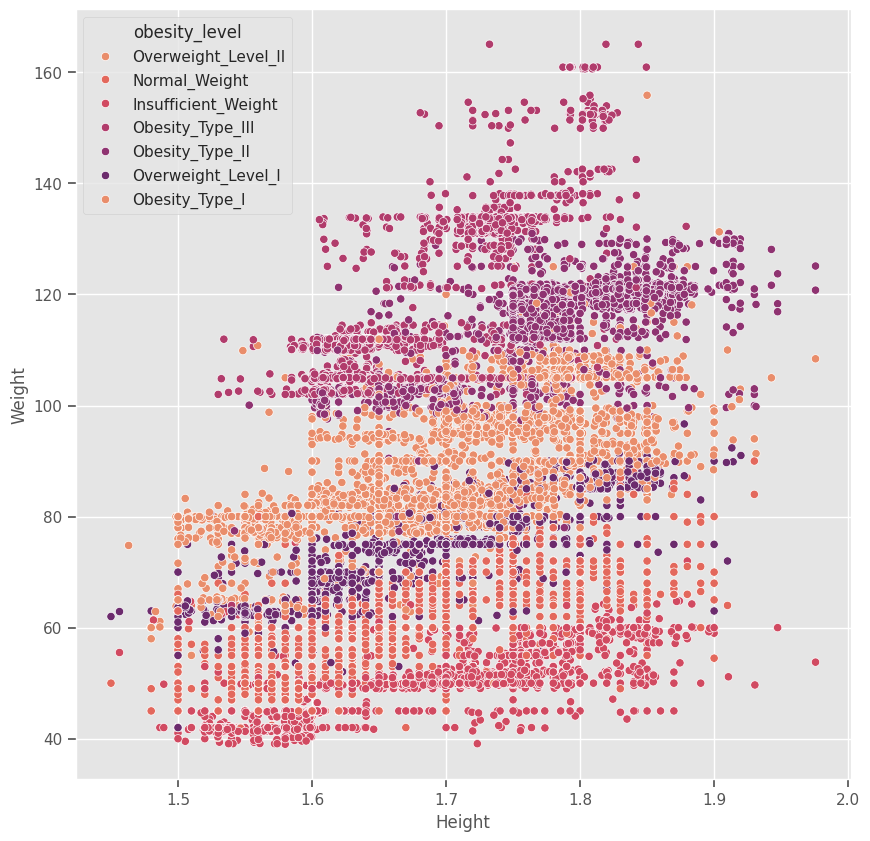

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(df, x= 'Height', y = 'Weight', hue = 'obesity_level',  palette = sns.color_palette("flare"))


the diagram shows clear realtion between obesity level and weight

<Axes: xlabel='FAF', ylabel='Age'>

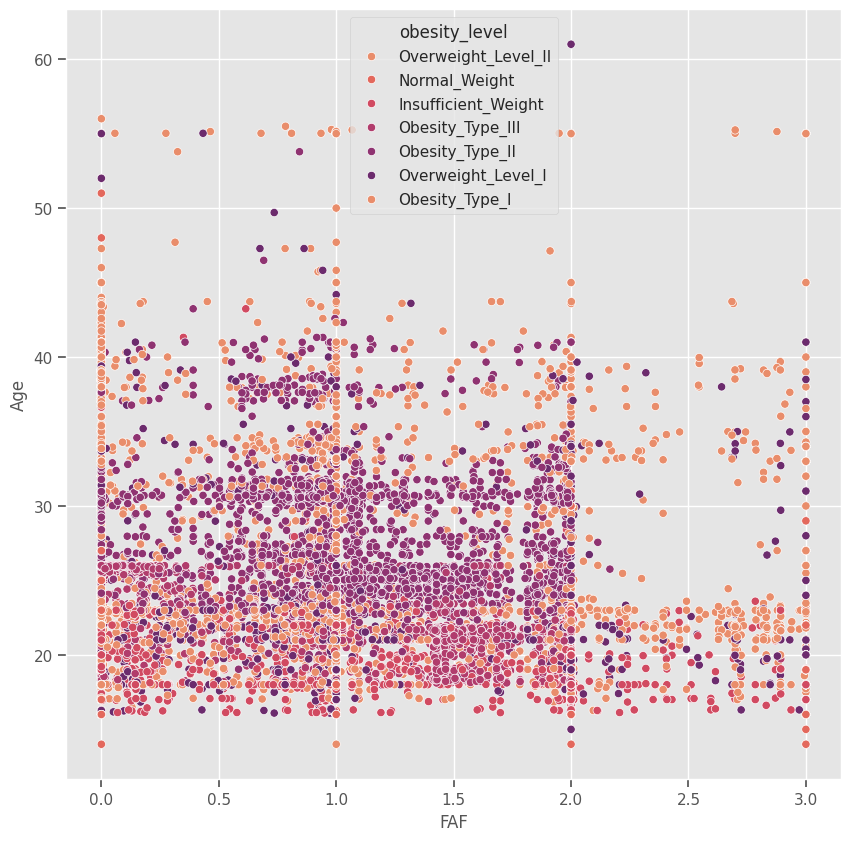

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(df, x= 'FAF', y = 'Age', hue = 'obesity_level',  palette = sns.color_palette("flare"))


# **Data Preprocessing**

## **checking outliers**

In [ ]:
num_columns = ['Age', 'Height', 'Weight', 'FCVC', 'BMI', 'CH2O', 'FAF', 'TUE']

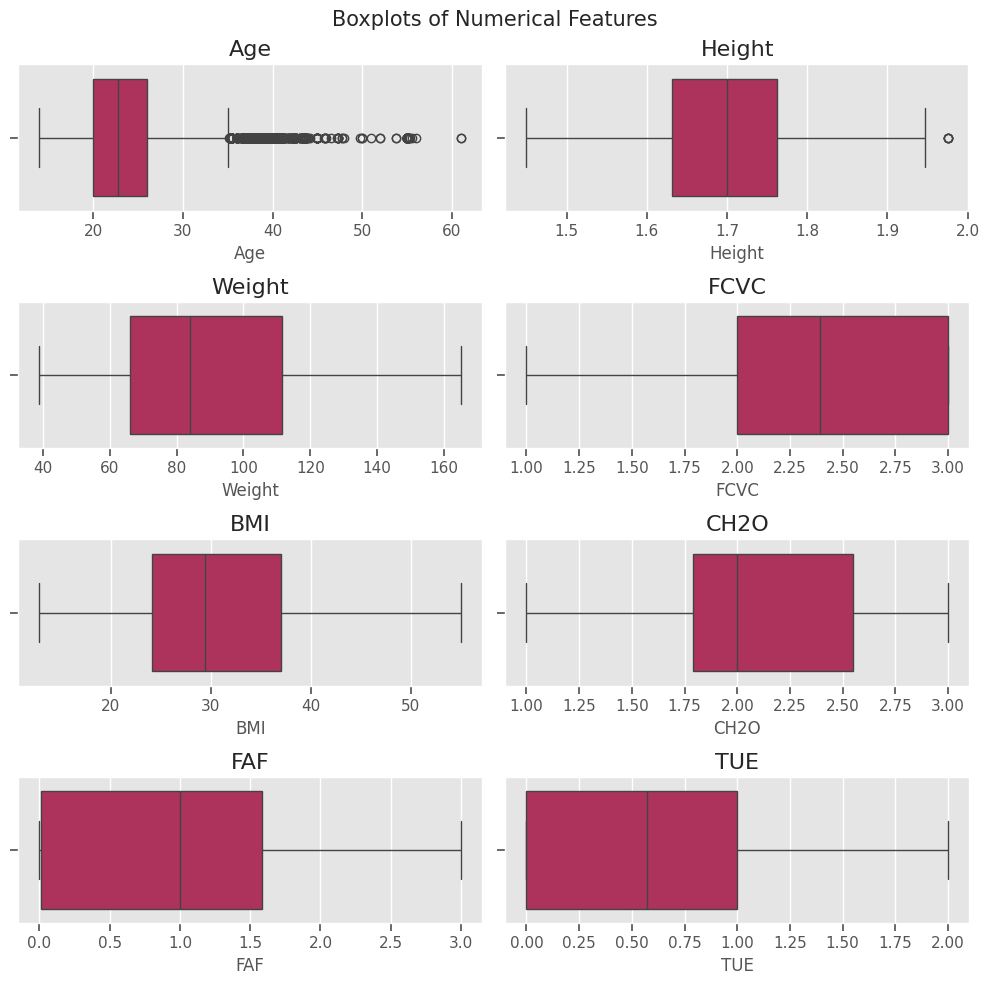

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(4, 2, figsize=(10,10))
fig.suptitle('Boxplots of Numerical Features', fontsize=15)
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(data=df, x=col, ax=axes[i],color = "#C21E56")
    axes[i].set_title(col, fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
def outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    out_data = df[(df[col_name] < lw) | (df[col_name] > uw)]
    print("Number of outliers:", len(out_data))
    print("Lower whisker:", lw)
    print("Upper whisker:", uw)
    print('percentage:', (len(out_data)/len(df))*100,"%")
    #return out_data


In [ ]:
outlier(df, 'Age')

Number of outliers: 1074
Lower whisker: 11.0
Upper whisker: 35.0
percentage: 5.173908854417574 %


#### **Handling outliers**
- only age column have outliers that too only 5.17% but we will not remove them as the age column is directly connected to obesity level.

In [ ]:

# splitting into train and test
X = df.drop(columns = 'obesity_level')
y = df['obesity_level']
X_train,X_test,y_train, y_test = train_test_split(
    X,y, test_size = 0.2
)
print(f'shape of data')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

shape of data
X_train: (16606, 17)
y_train: (16606,)
X_test: (4152, 17)
y_test: (4152,)


In [ ]:
# splitting training data in train and validation with k-fold cross validation
kf = KFold(n_splits=5)
for i, (train_index, valid_index) in enumerate(kf.split(X_train)):


  X_train_fold = X_train.iloc[train_index]
  y_train_fold = y_train.iloc[train_index]
  X_valid_fold = X_train.iloc[valid_index]
  y_valid_fold = y_train.iloc[valid_index]


#### **Encoding categorical columns into numerical**

In [8]:
cat_cols=  [col for col in df.columns if df[col].dtype =="object"]
cat_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
## encoding categorical columns to feed in machine learning model
oe = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value= -1, categories = [['Always','Frequently','Sometimes','No'],['Frequently','Sometimes','No']])
train_arr = oe.fit_transform(X_train[['CAEC','CALC']])
test_arr = oe.transform(X_test[['CAEC','CALC']])

In [ ]:
# for train and test
X_train[['CAEC','CALC']] = train_arr
X_test[['CAEC','CALC']] = test_arr

In [ ]:
#columns to encode with one hot encodeing
cat_cols_enc= ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS']

In [ ]:
ohe = OneHotEncoder(drop = 'first',sparse_output=False)
train_enc = pd.DataFrame(ohe.fit_transform(X_train[cat_cols_enc]))
test_enc = pd.DataFrame(ohe.transform(X_test[cat_cols_enc]))

In [ ]:
ohe.get_feature_names_out(cat_cols_enc)

array(['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'], dtype=object)

In [ ]:
train_enc.rename(columns = {0:'Gender',1:'family_history_with_overweight',2:'FAVC',3:'SMOKE',4:'SCC',5:'MTRANS_Bike',6:'MTRANS_Motorbike',
                            7:'MTRANS_Public_Transportation',8:'MTRANS_Walking'},inplace = True)
test_enc.rename(columns = {0:'Gender',1:'family_history_with_overweight',2:'FAVC',3:'SMOKE',4:'SCC',5:'MTRANS_Bike',6:'MTRANS_Motorbike',
                            7:'MTRANS_Public_Transportation',8:'MTRANS_Walking'},inplace = True)

In [ ]:
train_enc.index = X_train.index
test_enc.index = X_test.index

In [ ]:
train_enc.head()

Gender  family_history_with_overweight  FAVC  SMOKE  SCC  MTRANS_Bike  \
4235     0.0                             1.0   0.0    0.0  0.0          0.0   
2221     0.0                             0.0   1.0    0.0  0.0          0.0   
9527     1.0                             0.0   1.0    0.0  0.0          0.0   
555      0.0                             1.0   1.0    0.0  0.0          0.0   
7890     1.0                             1.0   1.0    0.0  0.0          0.0   

      MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
4235               0.0                           0.0             0.0  
2221               0.0                           1.0             0.0  
9527               0.0                           1.0             0.0  
555                0.0                           1.0             0.0  
7890               0.0                           1.0             0.0

In [ ]:
X_train.drop(columns = cat_cols_enc, inplace = True)
X_test.drop(columns = cat_cols_enc, inplace = True)

In [ ]:
X_train_enc = pd.concat([X_train,train_enc],axis= 1)
X_test_enc = pd.concat([X_test,test_enc],axis= 1)

In [ ]:
X_train_enc.head()

Age    Height     Weight  FCVC  NCP  CAEC      CH2O       FAF  \
4235  38.000000  1.560000  78.000000   2.0  3.0   2.0  1.000000  0.000000   
2221  19.472190  1.532322  42.069992   3.0  3.0   2.0  1.319437  1.060349   
9527  20.000000  1.650000  90.000000   2.0  3.0   2.0  3.000000  1.000000   
555   18.000000  1.609321  83.000000   2.0  3.0   2.0  1.051735  1.000000   
7890  18.216032  1.755978  52.058335   2.0  3.0   1.0  2.000000  0.144950   

           TUE  CALC        BMI  Gender  family_history_with_overweight  FAVC  \
4235  0.000000   1.0  32.051282     0.0                             1.0   0.0   
2221  0.953841   1.0  17.917291     0.0                             0.0   1.0   
9527  0.000000   1.0  33.057851     1.0                             0.0   1.0   
555   0.000000  -1.0  32.047395     0.0                             1.0   1.0   
7890  1.108145  -1.0  16.883098     1.0                             1.0   1.0   

      SMOKE  SCC  MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
4235    0.0  0.0          0.0               0.0                           0.0   
2221    0.0  0.0          0.0               0.0                           1.0   
9527    0.0  0.0          0.0               0.0                           1.0   
555     0.0  0.0          0.0               0.0                           1.0   
7890    0.0  0.0          0.0               0.0                           1.0   

      MTRANS_Walking  
4235             0.0  
2221             0.0  
9527             0.0  
555              0.0  
7890             0.0

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
target_order = le.inverse_transform([[0],[1],[2],[3],[4],[5],[6]])
target_order

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

# **Model Training**

In [ ]:
def tarin_valid_acc(model):
  kf = KFold(n_splits=5)
  total_train_acc = 0
  total_valid_acc = 0

  for i, (train_index, valid_index) in enumerate(kf.split(X_train_enc)):
    print(f"Fold {i}:")

    X_train_fold = X_train_enc.iloc[train_index]
    y_train_fold = y_train_enc[train_index]
    X_valid_fold = X_train_enc.iloc[valid_index]
    y_valid_fold = y_train_enc[valid_index]
    #X_train_fold = scaler.fit_transform(X_train_fold)
    #X_valid_fold = scaler.transform(X_valid_fold)

    model.fit(X_train_fold, y_train_fold)

    train_acc = model.score(X_train_fold, y_train_fold)
    valid_acc = model.score(X_valid_fold, y_valid_fold)

    total_train_acc += train_acc
    total_valid_acc += valid_acc

    # Calculate average accuracies
    average_train_acc = total_train_acc / 5
    average_valid_acc = total_valid_acc / 5


    print(f"train_acc - {train_acc}, valid_acc - {valid_acc}")
  print(f"Average Training Accuracy: {average_train_acc}")
  print(f"Average Validation Accuracy: {average_valid_acc}")

In [ ]:
kf = KFold(n_splits=5)

for i, (train_index, valid_index) in enumerate(kf.split(X_train_enc)):


  X_train_fold = X_train_enc.iloc[train_index]
  y_train_fold = y_train_enc[train_index]
  X_valid_fold = X_train_enc.iloc[valid_index]
  y_valid_fold = y_train_enc[valid_index]

### ***Logistic Regression***

In [ ]:
model_lr = LogisticRegression(penalty = None, multi_class='auto', random_state=42)

In [ ]:
tarin_valid_acc(model_lr)

Fold 0:
train_acc - 0.6797651309846432, valid_acc - 0.6800120409391932
Fold 1:
train_acc - 0.6764019570944675, valid_acc - 0.6799156880457693
Fold 2:
train_acc - 0.6791117802032367, valid_acc - 0.673291177356218
Fold 3:
train_acc - 0.6791870530673693, valid_acc - 0.675097862089732
Fold 4:
train_acc - 0.6767783214151298, valid_acc - 0.6799156880457693
Average Training Accuracy: 0.6782488485529693
Average Validation Accuracy: 0.6776464912953364


-- since logistic regression is underfitting as it does not perform well on multiclass classification we try some another classification model.

### ***Random Forest Classifier***

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)

In [ ]:
#trainiing on train and validation set
tarin_valid_acc(model_rf)

Fold 0:
train_acc - 0.9292381812707016, valid_acc - 0.892835641180012
Fold 1:
train_acc - 0.9267595031990967, valid_acc - 0.8928033724781692
Fold 2:
train_acc - 0.9275122318404215, valid_acc - 0.8946100572116832
Fold 3:
train_acc - 0.9266842303349643, valid_acc - 0.8982234266787112
Fold 4:
train_acc - 0.9285660519382762, valid_acc - 0.8934056007226739
Average Training Accuracy: 0.9277520397166921
Average Validation Accuracy: 0.89437561965425


#### Hyperparameter tuning using grid search cv

In [ ]:
grid = {'min_samples_split':[17,20,25],                 # larger values means less complexity,more regularization
        'min_samples_leaf': [9,10,11],             # Increasing min_samples_leaf can increase regularization
        'max_leaf_nodes': [1450,1500,1550],            # larger values means more complexity,less regularization
        'max_features': [15,16,17]}                        # more features means more complexity,less regularizatio}

estimator = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=estimator,
                                   param_grid= grid,
                                   verbose=4)
grid_search.fit(X_train_fold,
                  y_train_fold)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.873 total time=   4.2s
[CV 2/5] END max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.866 total time=   4.8s
[CV 3/5] END max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.878 total time=   4.7s
[CV 4/5] END max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.885 total time=   4.2s
[CV 5/5] END max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.881 total time=   4.9s
[CV 1/5] END max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=20;, score=0.874 total time=   4.6s
[CV 2/5] END max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=20;, score=0.867 total time=   4.5s
[CV 3/5] END max_features=15, max_leaf_nodes=1450, min_samples_

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [15, 16, 17],
                         'max_leaf_nodes': [1450, 1500, 1550],
                         'min_samples_leaf': [9, 10, 11],
                         'min_samples_split': [17, 20, 25]},
             verbose=4)

In [ ]:
# getting best parameters
best_params = grid_search.best_params_
best_params

{'max_features': 15,
 'max_leaf_nodes': 1450,
 'min_samples_leaf': 10,
 'min_samples_split': 17}

In [ ]:
# fitting model with best params
rf_clf = RandomForestClassifier(**best_params)

In [ ]:
tarin_valid_acc(rf_clf)

Fold 0:
train_acc - 0.9127521830773864, valid_acc - 0.8856110776640578
Fold 1:
train_acc - 0.912382386149793, valid_acc - 0.8900933453778982
Fold 2:
train_acc - 0.9096725630410237, valid_acc - 0.8885877747666365
Fold 3:
train_acc - 0.910651110274746, valid_acc - 0.8967178560674496
Fold 4:
train_acc - 0.9116296575084682, valid_acc - 0.8909966877446552
Average Training Accuracy: 0.9114175800102835
Average Validation Accuracy: 0.8904013483241394


as it is giving almost same results we will try some experimentation in base model

In [ ]:
model_rf.feature_importances_

array([7.41462892e-02, 4.95124907e-02, 2.65714442e-01, 7.04969502e-02,
       2.26294862e-02, 2.00323607e-02, 2.55845309e-02, 1.92058948e-02,
       2.89825452e-02, 1.27733512e-02, 3.15818983e-01, 5.77883094e-02,
       2.18229714e-02, 6.17859626e-03, 3.87366811e-04, 2.36013285e-03,
       1.65757171e-04, 1.32789923e-04, 5.18985521e-03, 1.07689730e-03])

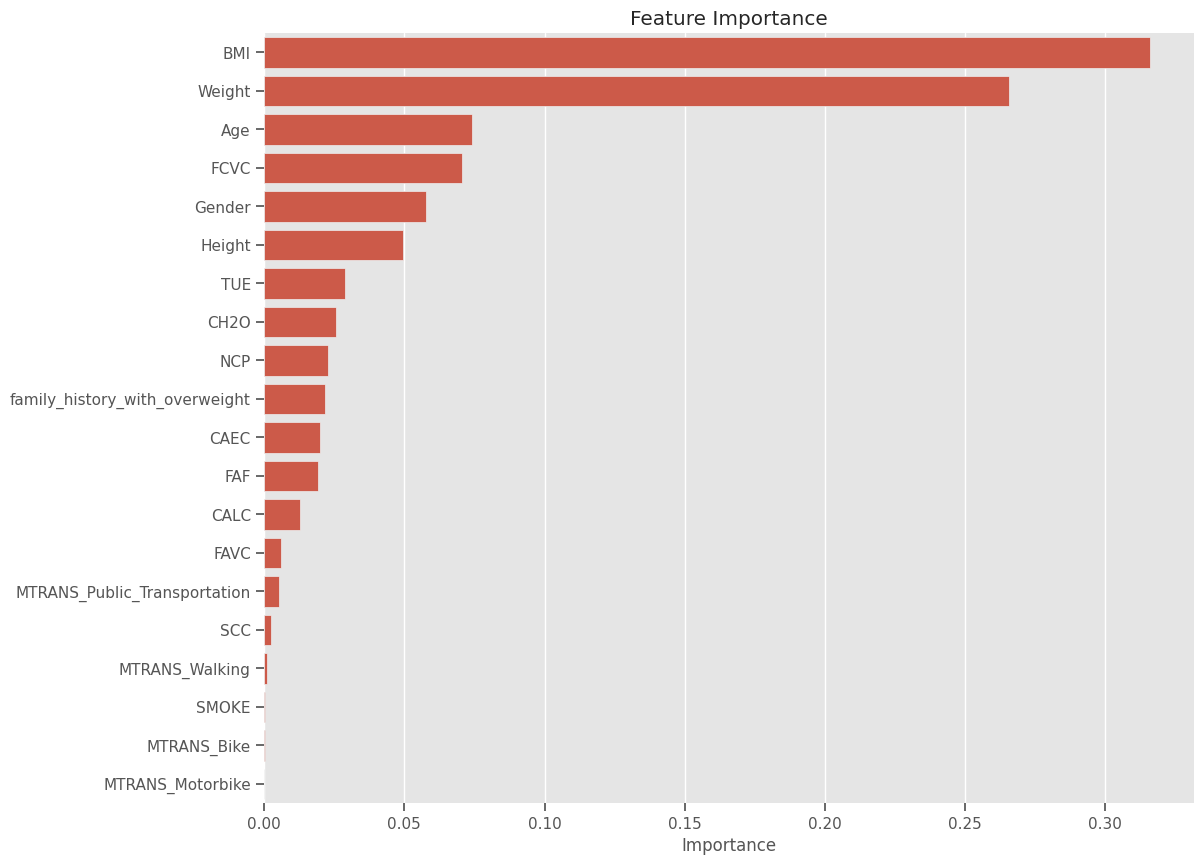

In [ ]:
feature_importance = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_fold.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
imp_col = ['Age', 'Height', 'Weight', 'FCVC','CAEC', 'CH2O','TUE','BMI','Gender','family_history_with_overweight','NCP','FAF']

In [ ]:
# training a model with improtant columns
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
model_rf.fit(X_train_fold[imp_col],y_train_fold)
train_acc = model_rf.score(X_train_fold[imp_col],y_train_fold)
valid_acc = model_rf.score(X_valid_fold[imp_col],y_valid_fold)
print(f'train_acc - {train_acc}, valid_acc - {valid_acc}')

train_acc - 0.9172751223184042, valid_acc - 0.8870822041553749


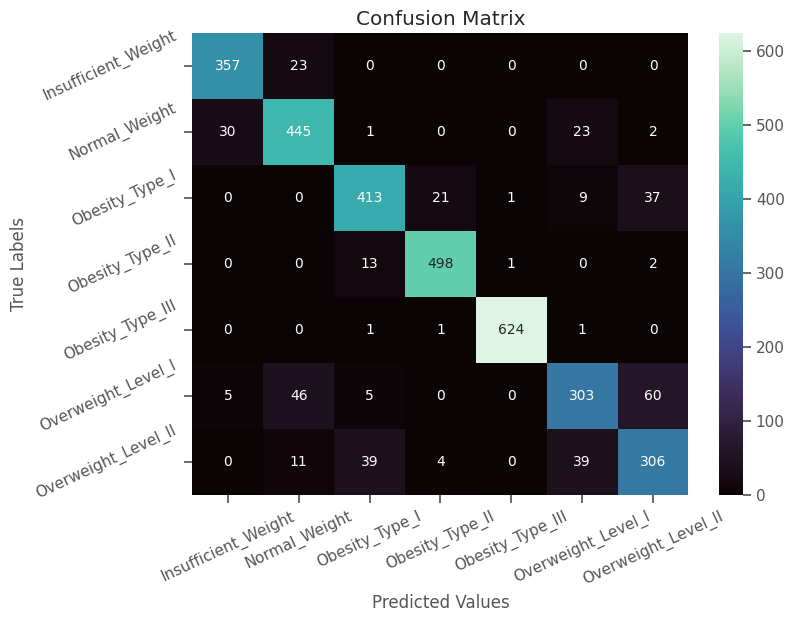

In [ ]:
predictions = model_rf.predict(X_valid_fold[imp_col])
cm = confusion_matrix(y_pred=predictions,y_true= y_valid_fold )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')

-- by confusion matrix we can interpret that overweight_level_I and overweight_level_II are the most missinterpreted classes we will try to resolve it with more interpretation

### ***Gradient Boosting Classifier***

In [ ]:
model_gb = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.05, n_estimators = 70, subsample = 0.8)

In [ ]:
tarin_valid_acc(model_gb)

Fold 0:
train_acc - 0.9003312255344775, valid_acc - 0.8868151715833835
Fold 1:
train_acc - 0.8985321791494166, valid_acc - 0.8840710629328515
Fold 2:
train_acc - 0.8962739932254422, valid_acc - 0.8903944595001505
Fold 3:
train_acc - 0.8976289047798268, valid_acc - 0.8919000301114123
Fold 4:
train_acc - 0.8968761761385021, valid_acc - 0.8958145137006925
Average Training Accuracy: 0.8979284957655331
Average Validation Accuracy: 0.889799047565698


### ***XG Boost Classifier***

In [ ]:
xgb1 = XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)

In [ ]:
tarin_valid_acc(xgb1)

Fold 0:
train_acc - 0.9933002107798856, valid_acc - 0.8973509933774835
Fold 1:
train_acc - 0.9933759879563417, valid_acc - 0.9030412526347485
Fold 2:
train_acc - 0.9937523522770041, valid_acc - 0.9036434808792533
Fold 3:
train_acc - 0.9939781708694015, valid_acc - 0.9069557362240289
Fold 4:
train_acc - 0.9934512608204742, valid_acc - 0.9057512797350196
Average Training Accuracy: 0.9935715965406213
Average Validation Accuracy: 0.9033485485701067


##### as this is overfitting, we will try to finetune it

In [ ]:
xgb2 = XGBClassifier(objective='multi:softmax', num_class=7, learning_rate = 0.05, max_depth = 20, n_estimators=70,
                     gamma=0,
                      subsample=0.8,
                      colsample_bytree=0.8, random_state=42)


In [ ]:
tarin_valid_acc(xgb2)

Fold 0:
train_acc - 0.9830623306233063, valid_acc - 0.8979530403371463
Fold 1:
train_acc - 0.9831388784343245, valid_acc - 0.8982234266787112
Fold 2:
train_acc - 0.9843432442604441, valid_acc - 0.9075579644685335
Fold 3:
train_acc - 0.9829883327060595, valid_acc - 0.9054501656127673
Fold 4:
train_acc - 0.9844937899887091, valid_acc - 0.9036434808792533
Average Training Accuracy: 0.9836053152025686
Average Validation Accuracy: 0.9025656155952824


In [ ]:
xgb3 = XGBClassifier(objective='multi:softmax', num_class=7, learning_rate = 0.005, max_depth = 10, n_estimators=70,
                     gamma=0,
                      subsample=0.8,
                      colsample_bytree=0.8, random_state=42)


In [ ]:
tarin_valid_acc(xgb3)

Fold 0:
train_acc - 0.9289370671484493, valid_acc - 0.8919325707405178
Fold 1:
train_acc - 0.9311253293187806, valid_acc - 0.8906955736224029
Fold 2:
train_acc - 0.9290929619872036, valid_acc - 0.8997289972899729
Fold 3:
train_acc - 0.9269853217914942, valid_acc - 0.8985245408009636
Fold 4:
train_acc - 0.9284155062100113, valid_acc - 0.8988256549232159
Average Training Accuracy: 0.9289112372911876
Average Validation Accuracy: 0.8959414674754147


##### now overfitting is reduced but it is giving same results as ranndom forest so we will go with random forest.

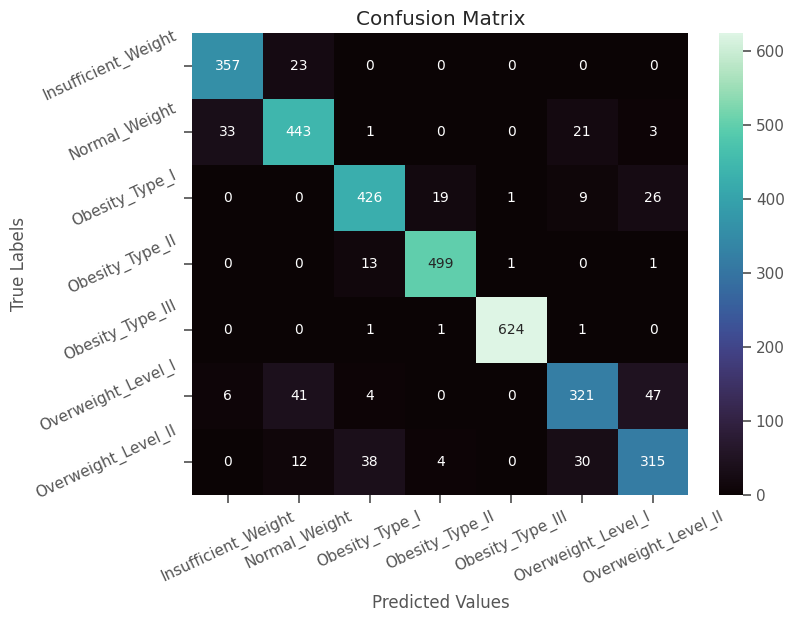

In [ ]:
predictions = xgb3.predict(X_valid_fold)
cm = confusion_matrix(y_pred=predictions,y_true= y_valid_fold )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')

In [ ]:
param_grid = {
    'max_depth':[5,6,7,8],
    'learning_rate': [0.08,0.1,0.2],
    'gamma':[0.4,0.5,0.55,0.6],
    'reg_lambda':[0.8,1,1.2]
    }

estimator = XGBClassifier(objective='multi:softmax',subsample=0.9,colsample_bytree=0.5,seed=42) #in order to speed up

grid_search = GridSearchCV(estimator=estimator,
                   param_grid=param_grid,
                   verbose=4,
                   n_jobs=-1)

grid_search.fit(X_train_fold,
                y_train_fold)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bi...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=-1,
             param_grid={'gamma': [0.4, 0.5, 0.55, 0.6],
                         'learning_rate': [0.08, 0.1, 0.2],
                         'max_depth': [5, 6, 7, 8],
                         'reg_lambda': [0.8, 1, 1.2]},
             verbose=4)

In [ ]:
best_params = grid_search.best_params_
best_params

{'gamma': 0.55, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 1}

In [ ]:
model_xgb = XGBClassifier(**best_params)

In [ ]:
tarin_valid_acc(model_xgb)

Fold 0:
train_acc - 0.953026196928636, valid_acc - 0.8970499698976521
Fold 1:
train_acc - 0.9513737297704178, valid_acc - 0.8994278831677206
Fold 2:
train_acc - 0.9551373729770418, valid_acc - 0.9027401385124962
Fold 3:
train_acc - 0.9485133609333836, valid_acc - 0.9069557362240289
Fold 4:
train_acc - 0.9528791870530674, valid_acc - 0.8997289972899729
Average Training Accuracy: 0.9521859695325092
Average Validation Accuracy: 0.901180545018374


In [ ]:
# traing with important columns with xgb model with best_param
model_xgb.fit(X_train_fold[imp_col],y_train_fold)
train_acc = model_xgb.score(X_train_fold[imp_col],y_train_fold)
valid_acc = model_xgb.score(X_valid_fold[imp_col],y_valid_fold)
print(f'train_acc - {train_acc}, valid_acc - {valid_acc}')

train_acc - 0.9432442604441099, valid_acc - 0.8946100572116832


In [ ]:
xgb3.fit(X_train_fold[imp_col],y_train_fold)
train_acc = xgb3.score(X_train_fold[imp_col],y_train_fold)
valid_acc = xgb3.score(X_valid_fold[imp_col],y_valid_fold)
print(f'train_acc - {train_acc}, valid_acc - {valid_acc}')


train_acc - 0.9244260444109899, valid_acc - 0.8934056007226739


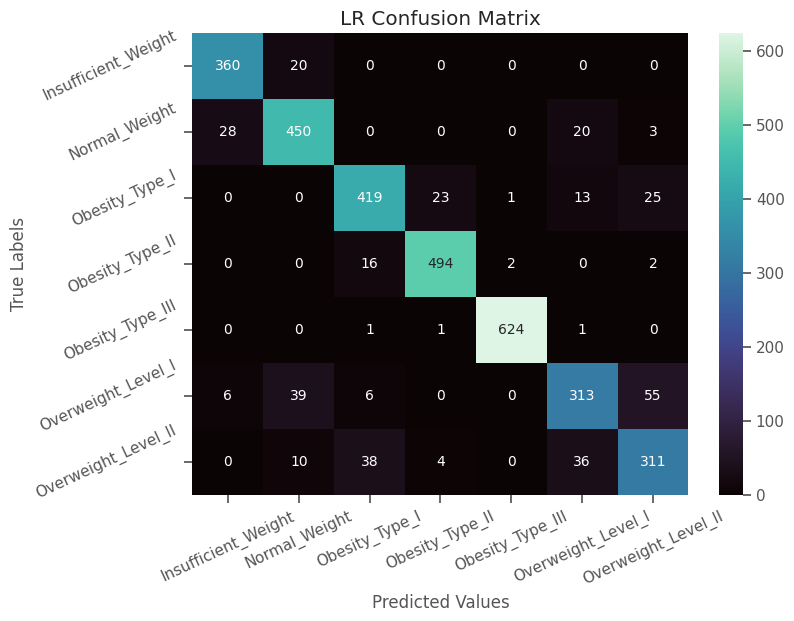

In [ ]:
predictions = model_xgb.predict(X_valid_fold[imp_col])
cm = confusion_matrix(y_pred=predictions,y_true= y_valid_fold )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('LR Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')

-- after trying some experiments we are getting best results with randomforest and xgb classifier we fit test set on both of these.
-- we will fit it with important cols as it is giving same results

In [ ]:
def score(model):

 print('Training Report\n',classification_report(y_train_enc , model.predict(X_train_enc[imp_col]),digits=4))
 print('-'*60)
 print('Testing Report\n',classification_report(y_test_enc, model.predict(X_test_enc[imp_col]),digits=4))


In [ ]:
start_time = time.strftime("%H:%M:%S", time.localtime())
end_time = time.strftime("%H:%M:%S", time.localtime())

In [ ]:
start_time = time.strftime("%H:%M:%S", time.localtime())
model_rf.fit(X_train_enc, y_train_enc)
end_time = time.strftime("%H:%M:%S", time.localtime())
print(f'start_time: {start_time},end_time: {end_time}')

start_time: 16:24:32,end_time: 16:24:33


In [ ]:
print('Training Report\n',classification_report(y_train_enc , model_rf.predict(X_train_enc),digits=4))
print('-'*60)
print('Testing Report\n',classification_report(y_test_enc, model_rf.predict(X_test_enc),digits=4))


Training Report
               precision    recall  f1-score   support

           0     0.9437    0.9479    0.9458      2033
           1     0.8932    0.9207    0.9067      2471
           2     0.9179    0.8865    0.9019      2334
           3     0.9774    0.9834    0.9804      2594
           4     0.9988    0.9975    0.9981      3228
           5     0.8709    0.7968    0.8322      1914
           6     0.8095    0.8676    0.8375      2032

    accuracy                         0.9232     16606
   macro avg     0.9159    0.9143    0.9147     16606
weighted avg     0.9237    0.9232    0.9231     16606

------------------------------------------------------------
Testing Report
               precision    recall  f1-score   support

           0     0.9424    0.9347    0.9385       490
           1     0.8590    0.8871    0.8728       611
           2     0.8809    0.8472    0.8637       576
           3     0.9636    0.9725    0.9680       654
           4     0.9951    0.9976    0

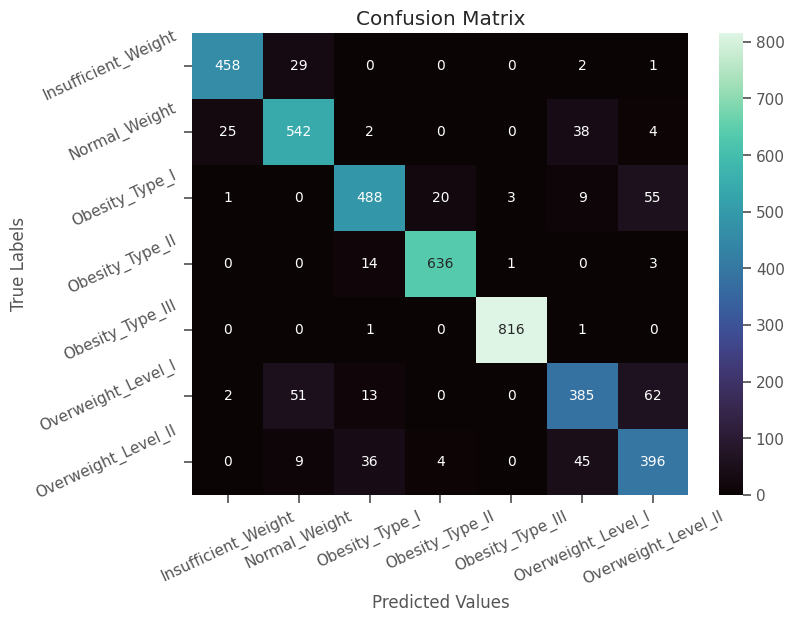

In [ ]:
predictions = model_rf.predict(X_test_enc)
cm = confusion_matrix(y_pred=predictions,y_true= y_test_enc )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')

In [ ]:
start_time = time.strftime("%H:%M:%S", time.localtime())
model_rf.fit(X_train_enc[imp_col], y_train_enc)
end_time = time.strftime("%H:%M:%S", time.localtime())
print(f'start_time: {start_time},end_time: {end_time}')

start_time: 16:24:35,end_time: 16:24:36


In [ ]:
score(model_rf)

Training Report
               precision    recall  f1-score   support

           0     0.9397    0.9429    0.9413      2033
           1     0.8834    0.9049    0.8940      2471
           2     0.9110    0.8899    0.9003      2334
           3     0.9789    0.9834    0.9812      2594
           4     0.9988    0.9975    0.9981      3228
           5     0.8168    0.7853    0.8007      1914
           6     0.8077    0.8287    0.8181      2032

    accuracy                         0.9146     16606
   macro avg     0.9052    0.9047    0.9048     16606
weighted avg     0.9146    0.9146    0.9145     16606

------------------------------------------------------------
Testing Report
               precision    recall  f1-score   support

           0     0.9309    0.9347    0.9328       490
           1     0.8583    0.8822    0.8701       611
           2     0.8829    0.8507    0.8665       576
           3     0.9652    0.9740    0.9696       654
           4     0.9951    0.9976    0

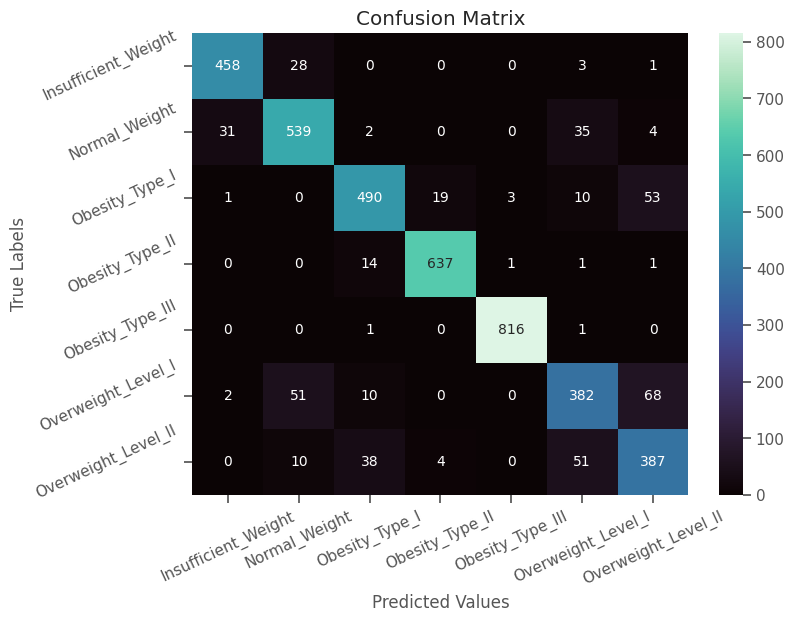

In [ ]:
predictions = model_rf.predict(X_test_enc[imp_col])
cm = confusion_matrix(y_pred=predictions,y_true= y_test_enc )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')

In [ ]:
start_time = time.strftime("%H:%M:%S", time.localtime())
xgb3.fit(X_train_enc, y_train_enc)
end_time = time.strftime("%H:%M:%S", time.localtime())
print(f'start_time: {start_time},end_time: {end_time}')

start_time: 16:24:37,end_time: 16:24:43


In [ ]:
print('Training Report\n',classification_report(y_train_enc , xgb3.predict(X_train_enc),digits=4))
print('-'*60)
print('Testing Report\n',classification_report(y_test_enc, xgb3.predict(X_test_enc),digits=4))


Training Report
               precision    recall  f1-score   support

           0     0.9290    0.9454    0.9371      2033
           1     0.8960    0.9061    0.9010      2471
           2     0.9194    0.9139    0.9166      2334
           3     0.9740    0.9827    0.9783      2594
           4     0.9978    0.9975    0.9977      3228
           5     0.8732    0.8166    0.8440      1914
           6     0.8560    0.8780    0.8669      2032

    accuracy                         0.9280     16606
   macro avg     0.9208    0.9200    0.9202     16606
weighted avg     0.9278    0.9280    0.9277     16606

------------------------------------------------------------
Testing Report
               precision    recall  f1-score   support

           0     0.9270    0.9327    0.9298       490
           1     0.8521    0.8773    0.8645       611
           2     0.8918    0.8872    0.8895       576
           3     0.9668    0.9786    0.9726       654
           4     0.9951    0.9976    0

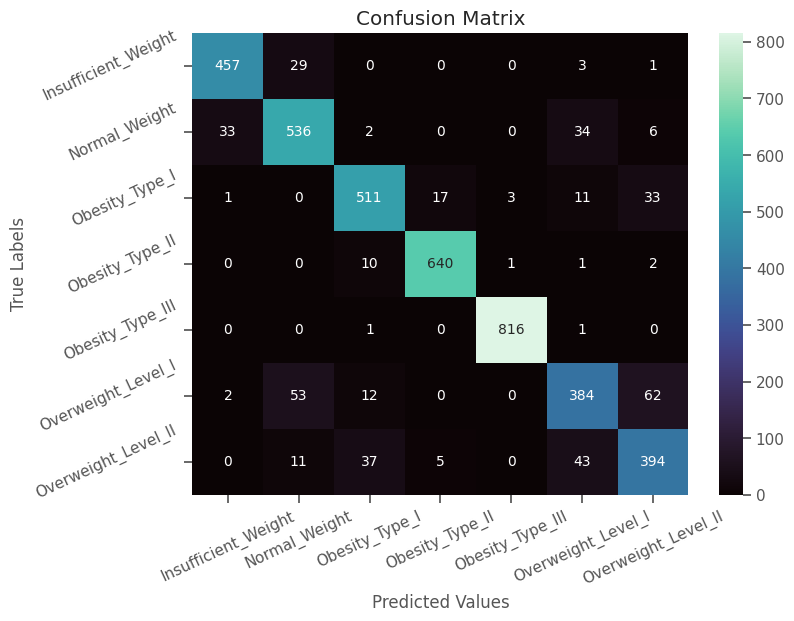

In [ ]:
predictions = xgb3.predict(X_test_enc)
cm = confusion_matrix(y_pred=predictions,y_true= y_test_enc )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')

In [ ]:
start_time = time.strftime("%H:%M:%S", time.localtime())
xgb3.fit(X_train_enc[imp_col], y_train_enc)
end_time = time.strftime("%H:%M:%S", time.localtime())
print(f'start_time: {start_time},end_time: {end_time}')

start_time: 16:24:44,end_time: 16:24:47


In [ ]:
score(xgb3)

Training Report
               precision    recall  f1-score   support

           0     0.9281    0.9454    0.9366      2033
           1     0.8907    0.9000    0.8953      2471
           2     0.9128    0.9109    0.9119      2334
           3     0.9744    0.9823    0.9783      2594
           4     0.9972    0.9975    0.9974      3228
           5     0.8415    0.8098    0.8253      1914
           6     0.8497    0.8460    0.8478      2032

    accuracy                         0.9219     16606
   macro avg     0.9135    0.9131    0.9132     16606
weighted avg     0.9215    0.9219    0.9216     16606

------------------------------------------------------------
Testing Report
               precision    recall  f1-score   support

           0     0.9249    0.9306    0.9278       490
           1     0.8469    0.8691    0.8578       611
           2     0.8861    0.8646    0.8752       576
           3     0.9580    0.9771    0.9674       654
           4     0.9939    0.9976    0

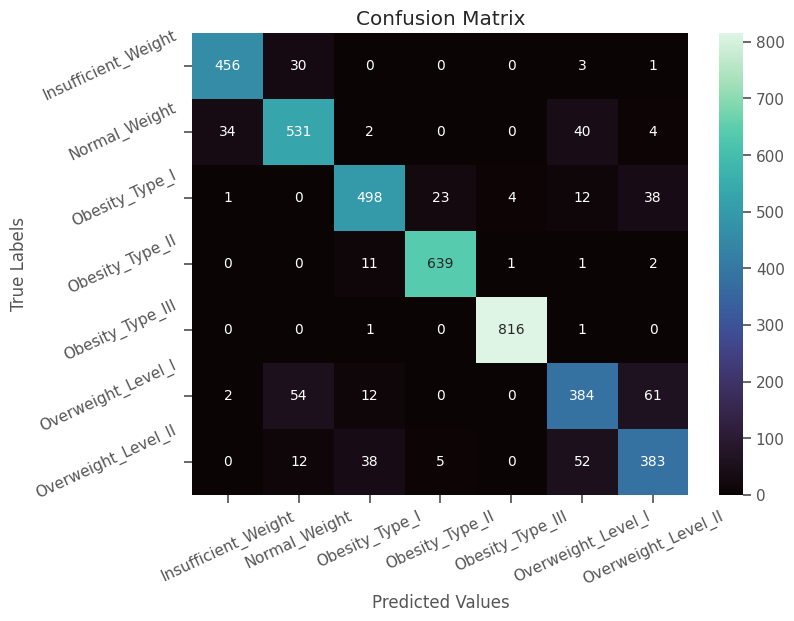

In [ ]:
predictions = xgb3.predict(X_test_enc[imp_col])
cm = confusion_matrix(y_pred=predictions,y_true= y_test_enc )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')

Finally we will select random forest model trained with important columns for some reasons:
- Same performance on full and important columns that's why we will train on important columns as it will reduce model complexity.
- Random forest is taking lesser time than XGboost to train while they both are giving same result.
- Confusion matrix made by both the models is almost same. overweight_level_I and overweight_level_II are most misclassified classes in both.
- Random forest model is less complex than XGBoost.


## **Fitting Pipeline**

In [ ]:
## we will re-read data to fit it in column transfer and pipeline.
df = pd.read_csv("/content/train.csv")

In [ ]:
df.rename(columns = {'NObeyesdad':'obesity_level'}, inplace = True)

In [ ]:
df['BMI'] = df['Weight']/(df['Height'])**2

In [ ]:
# splitting in train and test.
X = df.drop(columns = 'obesity_level')
y = df['obesity_level']
X_train,X_test,y_train, y_test = train_test_split(
    X,y, test_size = 0.2
)
print(f'shape of data')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

shape of data
X_train: (16606, 18)
y_train: (16606,)
X_test: (4152, 18)
y_test: (4152,)


In [ ]:
imp_col = ['Age', 'Height', 'Weight', 'FCVC','CAEC', 'CH2O','TUE','BMI','Gender','family_history_with_overweight','NCP','FAF']

In [ ]:
train_data = X_train[imp_col]
test_data = X_test[imp_col]

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
cat_cols_enc= ['Gender','family_history_with_overweight']

In [ ]:
ct_encoding = ColumnTransformer(transformers = [

              ("ord_enc", OrdinalEncoder(handle_unknown = "use_encoded_value",
                                         unknown_value = -1,categories = [['Always','Frequently','Sometimes','No']]),['CAEC']),
              ("ohe_enc", OneHotEncoder(sparse_output = False,
                                        handle_unknown = "ignore",drop = 'first'),cat_cols_enc)

], remainder = "passthrough")

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)

In [ ]:
pipe = Pipeline(steps=[
    ("encoding", ct_encoding),
    ("model", model_rf)
])

In [ ]:
pipe.fit(train_data,y_train_enc)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_enc',
                                                  OrdinalEncoder(categories=[['Always',
                                                                              'Frequently',
                                                                              'Sometimes',
                                                                              'No']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['CAEC']),
                                                 ('ohe_enc',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'family_history_with_overweight'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))])

In [ ]:
import joblib

joblib.dump(pipe, "obesity_level_predictor.joblib")

['obesity_level_predictor.joblib']

In [ ]:
new_model = joblib.load("obesity_level_predictor.joblib")

In [ ]:
new_model.predict(test_data)


array([4, 0, 6, ..., 6, 5, 0])

In [ ]:
test_data['obesity_level'] = new_model.predict(test_data)


<ipython-input-20-80b3d5788ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['obesity_level'] = new_model.predict(test_data)


In [ ]:
test_data

Age    Height      Weight      FCVC       CAEC      CH2O  \
10757  19.994543  1.848294   85.000000  2.000000  Sometimes  2.000000   
18674  21.000000  1.750000   75.000000  3.000000  Sometimes  1.000000   
2962   22.909992  1.675612   87.676154  2.222282  Sometimes  3.000000   
4877   18.000000  1.791867  108.742005  2.000000  Sometimes  3.000000   
7407   19.443639  1.741192  131.529267  3.000000  Sometimes  1.846754   
...          ...       ...         ...       ...        ...       ...   
17644  25.994949  1.642892  104.899348  3.000000  Sometimes  1.020313   
8329   17.673900  1.660840   49.039794  2.750715  Sometimes  2.000000   
16572  33.690239  1.790000   90.000000  2.000000  Sometimes  2.976177   
14612  17.038222  1.830068   58.854416  2.416044  Sometimes  2.000000   
1040   16.000000  1.600000   45.000000  2.000000  Sometimes  2.000000   

            TUE        BMI  Gender family_history_with_overweight       NCP  \
10757  0.121992  24.881515    Male                             no  3.000000   
18674  0.000000  24.489796    Male                            yes  3.000000   
2962   1.000000  31.227309  Female                            yes  1.226342   
4877   1.000000  33.867707    Male                            yes  1.226342   
7407   0.939726  43.383948  Female                            yes  3.000000   
...         ...        ...     ...                            ...       ...   
17644  0.062167  38.864650  Female                            yes  3.000000   
8329   2.000000  17.778415  Female                             no  3.000000   
16572  0.000000  28.089011    Male                            yes  1.099151   
14612  0.912457  17.572947    Male                            yes  3.000000   
1040   1.000000  17.578125  Female                             no  3.000000   

            FAF  
10757  1.000000  
18674  2.000000  
2962   1.356468  
4877   1.000000  
7407   1.718543  
...         ...  
17644  0.001297  
8329   0.000000  
16572  2.287423  
14612  2.011646  
1040   1.000000  

[4152 rows x 12 columns]

In [ ]:
temp_df = pd.DataFrame(data=[[19,'Male',1.84,85,24.88,'no',3,'Sometimes',2,2,1,0.12]],
                      columns=['Age', 'Gender', 'Height', 'Weight', 'BMI','family_history_with_overweight','NCP','CAEC','CH2O','FCVC','FAF','TUE'])

In [ ]:
y_pred = new_model.predict(temp_df)

In [ ]:
float(y_pred)


5.0

In [ ]:
target_order = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II']

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
print(f'obesity_level: {target_order[int(y_pred)]}')

obesity_level: Overweight_Level_I


In [ ]:
prob = round((new_model.predict_proba(temp_df).max())*100,2)

In [ ]:
prob

63.09

In [ ]:
print(f"{prob}%")

63.09%


In [ ]:
print(f'obesity_level: {target_order[int(y_pred)]}')

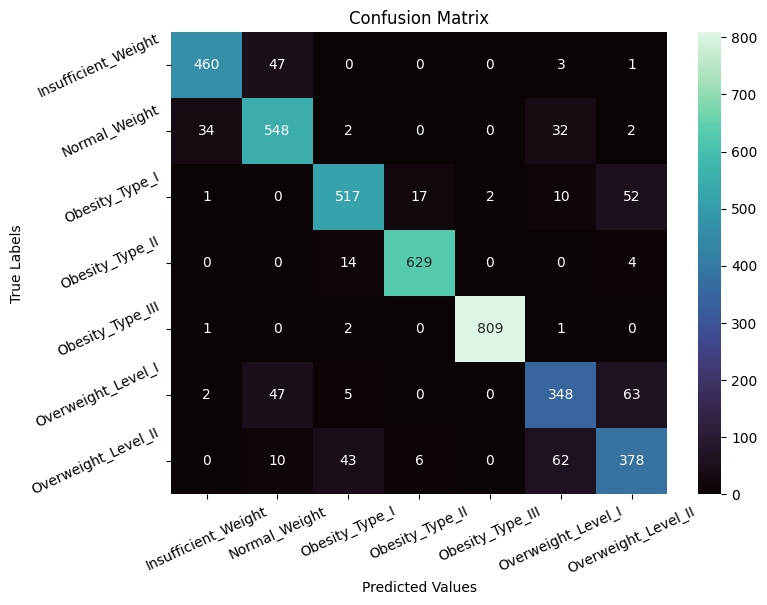

In [ ]:
predictions = new_model.predict(test_data)
cm = confusion_matrix(y_pred=predictions,y_true= y_test_enc )
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
ax.set_xticklabels(target_order, rotation=25)
ax.set_yticklabels(target_order, rotation=25)
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')